# Cleaning Data

At this stage, it is important to clean the 100x100data. 

Several issues were highlighted throughout the process.

### # of Finishers
As part of the analysis, DUV and ITRA finishers time were downloaded to verify runner's status and, if lucky, finishing time. 

When comparing the scraped 100x100 data to DUV and ITRA, it came to light that sometimes, runners are marked as finished on 100x100trail, although they did not get a finishers status on ITRA or DUV. THis required cleaning. 

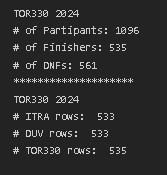

Furthermore, sometimes runners were given a status of not finished. THis was easily fixed by checking their timestamp at finish line (Courmayer). However, in that case, it was made sure that there was a timestamp for them between road Stages

### Life bases / Refugees

Several cleaning methods were deployed to clean this column. There were 'RITIRIO' in some values, so this needed to be stripped and kept in a different column 

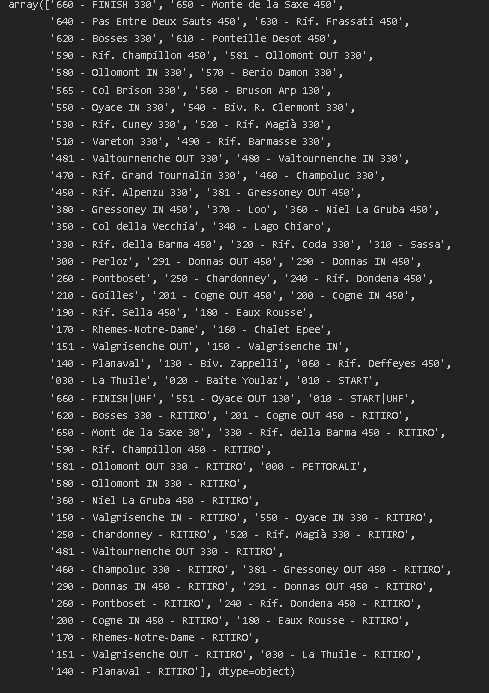


### 'Time' column
'Time' Column is one the most important columns in this process and needs to be meticulously cleaned for errors and inconsitencies!

The timesstamps had '+02:00' which was not necessary once inspected. 
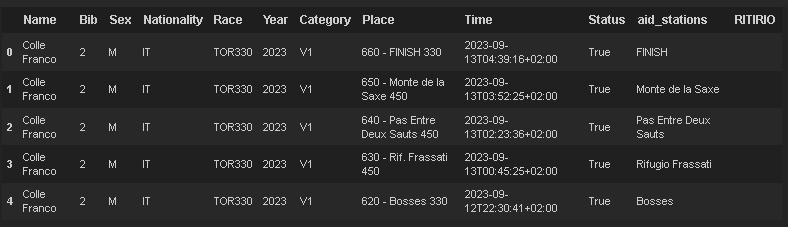


### Starting Time
Starting Times were also inaccurate. The starting time was set random times (who knows why?) but the times were changed to reflect wave start times!
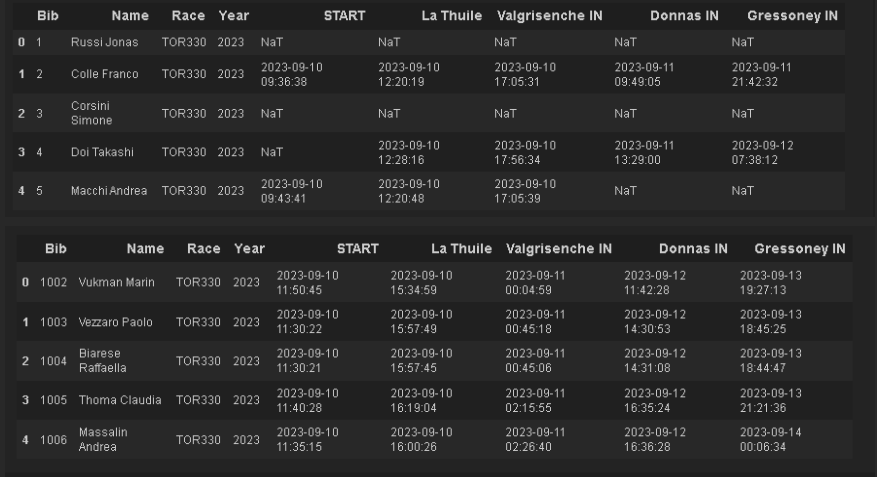

To deal with the Start Time, issue, DUV data was used to detect the start date for each year

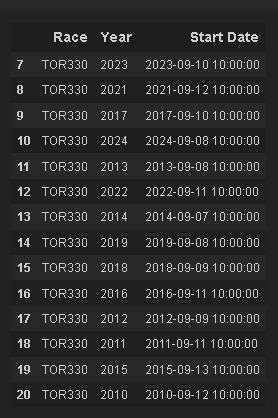

In [1]:
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### FIX BARMASSE
### FIX BARMA

In [3]:
# # Set pandas options to display all columns and rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

## Looping through scraped data from 100X100trail

In [4]:
races = ['TOR330'
#         ,'TOR450'
        ]
years = [ 
    '2021',
#         '2022',
#          '2023', 
#     '2024'
        ]

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/1. 100x100trail/{race}_{year}.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50),

TOR330_2021 (28600, 10)
**************************************************
TOR330_2021 (28600, 10)
**************************************************


In [5]:
TORX_df_concat = pd.concat(TORX_df)

In [6]:
TOR330 = TORX_df_concat[TORX_df_concat['Year'] == year]
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2021 0  Colle Franco    1   M          IT  TOR330  2021       V1   
            1  Colle Franco    1   M          IT  TOR330  2021       V1   
            2  Colle Franco    1   M          IT  TOR330  2021       V1   
            3  Colle Franco    1   M          IT  TOR330  2021       V1   
            4  Colle Franco    1   M          IT  TOR330  2021       V1   

                                               Place  \
TOR330_2021 0           660 - FINISH 330|349.3|30879   
            1  650 - Mont de la Saxe 130|133.7|12388   
            2    630 - Rif. Frassati 130|118.9|11422   
            3           620 - Bosses 130|109.8|10210   
            4  610 - Ponteille Desot 330|308.9|28045   

                                    Time  Status  
TOR330_2021 0  2021-09-15T04:43:57+00:00    True  
            1  2021-09-15T04:04:48+00:00    True  
            2  2021-09-15T01:19:06+00:00    True  
            3  2021-09-14T23:19:05+00:00    True  
            4  2021-09-14T21:59:00+00:00    True

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2021 0  Colle Franco    1   M          IT  TOR330  2021       V1   
            1  Colle Franco    1   M          IT  TOR330  2021       V1   
            2  Colle Franco    1   M          IT  TOR330  2021       V1   
            3  Colle Franco    1   M          IT  TOR330  2021       V1   
            4  Colle Franco    1   M          IT  TOR330  2021       V1   

                                               Place  \
TOR330_2021 0           660 - FINISH 330|349.3|30879   
            1  650 - Mont de la Saxe 130|133.7|12388   
            2    630 - Rif. Frassati 130|118.9|11422   
            3           620 - Bosses 130|109.8|10210   
            4  610 - Ponteille Desot 330|308.9|28045   

                                    Time  Status  
TOR330_2021 0  2021-09-15T04:43:57+00:00    True  
            1  2021-09-15T04:04:48+00:00    True  
            2  2021-09-15T01:19:06+00:00    True  
            3  2021-09-14T23:19:05+00:00    True  
            4  2021-09-14T21:59:00+00:00    True

In [7]:
def counting_finish_DNF_dataset(df):
    for year in years :
        for race in races:

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()))
                
                
                
                # Finishers
                print('# of Finishers:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  True)].unique()))
                # DNFs
                print('# of DNFs:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  False)].unique()))
                print('*'*20)
            else:
                pass
            
counting_finish_DNF_dataset(TOR330)

TOR330 2021
# of Partipants: 712
# of Finishers: 432
# of DNFs: 280
********************
TOR330 2021
# of Partipants: 712
# of Finishers: 432
# of DNFs: 280
********************


In [8]:
def counting_groupby_dataset(df, column):
    for year in years :
        for race in races:
            
            df = df[['Name', 'Status', 'Year', 'Race']].drop_duplicates()

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()), '\n')
                
                print(df.groupby([column])[column].count())
                print('*'*20)
            else:
                pass
counting_groupby_dataset(df,  'Status')

TOR330 2021
# of Partipants: 712 

Status
False    280
True     432
Name: Status, dtype: int64
********************
TOR330 2021
# of Partipants: 712 

Status
False    280
True     432
Name: Status, dtype: int64
********************


### DUV and ITRA data


#### # of Finishers
As part of the analysis, DUV and ITRA finishers time were downloaded to verify runner's status and, if lucky, finishing time. 

When comparing the scraped 100x100 data to DUV and ITRA, it came to light that sometimes, runners are marked as finished on 100x100trail, although they did not get a finishers status on ITRA or DUV. THis required cleaning. 

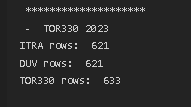


In [9]:
TORX_duv_df = pd.read_excel(f'{race} data/5. Clean Data for Data Visualisation/{race}_duv.xlsx',
                                     dtype={'Year': 'string'})

TORX_itra_no_DNF = pd.read_excel(f'{race} Data/5. Clean Data for Data Visualisation/{race}_itra_no_DNF.xlsx',
                                     dtype={'Year': 'string'})

In [10]:
def find_out_the_rows_difference_between_datasets(df):
    for year in years :
        for race in races:
            if len(df['Name'][(df['Year'] == year)]) != 0:

                print(race, year)
                print('# ITRA rows: ', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                                  (TORX_itra_no_DNF['Race'] == race)].shape[0])
                print('# DUV rows: ',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                                  (TORX_duv_df['Race'] == race)].shape[0])

                print('# TOR330 rows: ', len(df['Name'][(df['Year'] == year) &
                                                 (df['Race'] == race) &
                                                 (df['Status'] == True)].unique()))
                print('\n', '*'*20)
                
                if year == '2022':
                    print(' - ','TOR330','2022')
                    print(TORX_itra_no_DNF[(TORX_itra_no_DNF['Race'] == 'TOR330') &
                          (TORX_itra_no_DNF['Year'] == '2022')].groupby(['Status'])['Status'].count())
                    print('\n', '*'*20)
            else: 
                pass

In [11]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2021
# of Partipants: 712
# of Finishers: 432
# of DNFs: 280
********************
TOR330 2021
# ITRA rows:  431
# DUV rows:  431
# TOR330 rows:  432

 ********************
TOR330 2021
# of Partipants: 712 

Status
False    280
True     432
Name: Status, dtype: int64
********************
TOR330 2021
# of Partipants: 712
# of Finishers: 432
# of DNFs: 280
********************
TOR330 2021
# ITRA rows:  431
# DUV rows:  431
# TOR330 rows:  432

 ********************
TOR330 2021
# of Partipants: 712 

Status
False    280
True     432
Name: Status, dtype: int64
********************


### Cleaning Place column

In [12]:
TOR330['Place'].unique()

array(['660 - FINISH 330|349.3|30879',
       '650 - Mont de la Saxe 130|133.7|12388',
       '630 - Rif. Frassati 130|118.9|11422',
       '620 - Bosses 130|109.8|10210',
       '610 - Ponteille Desot 330|308.9|28045',
       '590 - Rif. Champillon 330|303.5|27681',
       '581 - Ollomont OUT330|298.5|26602',
       '580 - Ollomont 330 IN|298.5|26602',
       '570 - Berio Damon 130|83.7|8089', '550 - Oyace 330|285.1|25038',
       '540 - Biv. R. Clermont 130|63.6|6242',
       '530 - Rif. Cuney 130|58.9|5762',
       '520 - Rif. Magià 330|266.6|23540',
       '490 - Rif. Barmasse 330|252.8|22390',
       '481 - Valtournenche OUT 330|248.2|21547',
       '480 - Valtournenche 130 IN|33.1|3247\\t',
       '470 - Rif. Grand Tournalin 330|239.1|21172',
       '460 - Champoluc 330|230.8|20019',
       '450 - Rif. Alpenzu 130|3.6|526',
       '381 - Gressoney 330 OUT|213.4|18300',
       '380 - Gressoney 330 IN|213.4|18300', '370 - Loo|206|18063',
       '360 - Niel - La Gruba 330|199.7|1716

array(['660 - FINISH 330|349.3|30879',
       '650 - Mont de la Saxe 130|133.7|12388',
       '630 - Rif. Frassati 130|118.9|11422',
       '620 - Bosses 130|109.8|10210',
       '610 - Ponteille Desot 330|308.9|28045',
       '590 - Rif. Champillon 330|303.5|27681',
       '581 - Ollomont OUT330|298.5|26602',
       '580 - Ollomont 330 IN|298.5|26602',
       '570 - Berio Damon 130|83.7|8089', '550 - Oyace 330|285.1|25038',
       '540 - Biv. R. Clermont 130|63.6|6242',
       '530 - Rif. Cuney 130|58.9|5762',
       '520 - Rif. Magià 330|266.6|23540',
       '490 - Rif. Barmasse 330|252.8|22390',
       '481 - Valtournenche OUT 330|248.2|21547',
       '480 - Valtournenche 130 IN|33.1|3247\\t',
       '470 - Rif. Grand Tournalin 330|239.1|21172',
       '460 - Champoluc 330|230.8|20019',
       '450 - Rif. Alpenzu 130|3.6|526',
       '381 - Gressoney 330 OUT|213.4|18300',
       '380 - Gressoney 330 IN|213.4|18300', '370 - Loo|206|18063',
       '360 - Niel - La Gruba 330|199.7|1716

In [13]:
# 030 - La Thuile - RITIRO
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Barma')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Niel - ','Niel ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Oyace IN','Oyace')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('  ',' ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Mont de la Saxe','Monte de la Saxe')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rifugio della Barmasse', 'Rifugio Barmasse')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Promoud','Bivacco Zappelli')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('FINISH - UHF','FINISH')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('START - MANUAL','START')
TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()
TOR330['RITIRIO'] = np.where(
    TOR330['aid_stations'].str.contains('RITIRO', na=False), 
    TOR330['aid_stations'],  '')
# TOR330['RITIRIO] =TOR330['RITIRIO].str.replace('- RITIRO', '')
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)

TOR330 = TOR330[~(TOR330['aid_stations'] == '') ]
print(', '.join(list(TOR330['aid_stations'].unique())))


C:\Users\Karina\AppData\Local\Temp\ipykernel_18612\502743564.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Barma')
C:\Users\Karina\AppData\Local\Temp\ipykernel_18612\502743564.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Barma')
C:\Users\Karina\AppData\Local\Temp\ipykernel_18612\502743564.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_18612\502743564.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Bi

FINISH, Monte de la Saxe, Rifugio Frassati, Bosses, Ponteille Desot, Rifugio Champillon, Ollomont OUT, Ollomont IN, Berio Damon, Oyace, Bivacco R. Clermont, Rifugio Cuney, Rifugio Magià, Rifugio Barmasse, Valtournenche OUT, Valtournenche IN, Rifugio Grand Tournalin, Champoluc, Rifugio Alpenzu, Gressoney OUT, Gressoney IN, Loo, Niel La Gruba, Col della Vecchia, Lago Chiaro, Rifugio della Barma, Rifugio Coda, Sassa, Perloz, Donnas OUT, Donnas IN, Pontboset, Chardonney, Rifugio Dondena, Sogno, Goilles, Cogne OUT, Cogne IN, Rifugio Sella, Eaux Rousse, Rhemes-Notre-Dame, Chalet Epee, Valgrisenche OUT, Valgrisenche IN, Bivacco Zappelli, Rifugio Deffeyes, La Thuile, Baite Youlaz, START, Pas Entre Deux Sauts, Bruson Arp, Vareton, Planaval, Rifugio Ferraro
FINISH, Monte de la Saxe, Rifugio Frassati, Bosses, Ponteille Desot, Rifugio Champillon, Ollomont OUT, Ollomont IN, Berio Damon, Oyace, Bivacco R. Clermont, Rifugio Cuney, Rifugio Magià, Rifugio Barmasse, Valtournenche OUT, Valtournenche IN, 

In [14]:
# copy the column to make a new column
for i in list(TOR330['RITIRIO'].unique()):
    print(i)

### Cleaning Time column

Column '2024-09-11T07:08:32+02:00' needs to be fixed into '2024-09-11 07:08:32' and turned into the datetime

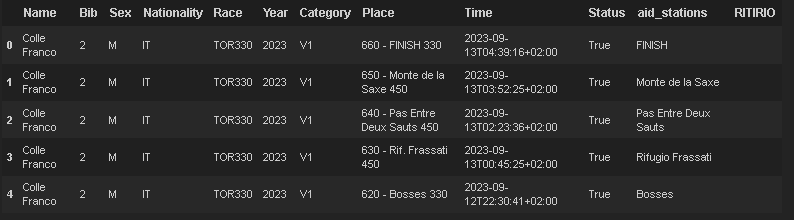

In [15]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# # NO NEED!!!
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2021 0  Colle Franco    1   M          IT  TOR330  2021       V1   
            1  Colle Franco    1   M          IT  TOR330  2021       V1   
            2  Colle Franco    1   M          IT  TOR330  2021       V1   
            3  Colle Franco    1   M          IT  TOR330  2021       V1   
            4  Colle Franco    1   M          IT  TOR330  2021       V1   

                                               Place  \
TOR330_2021 0           660 - FINISH 330|349.3|30879   
            1  650 - Mont de la Saxe 130|133.7|12388   
            2    630 - Rif. Frassati 130|118.9|11422   
            3           620 - Bosses 130|109.8|10210   
            4  610 - Ponteille Desot 330|308.9|28045   

                                    Time  Status      aid_stations RITIRIO  \
TOR330_2021 0  2021-09-15T04:43:57+00:00    True            FINISH           
            1  2021-09-15T04:04:48+00:00    True  Monte de la Saxe           
            2  2021-09-15T01:19:06+00:00    True  Rifugio Frassati           
            3  2021-09-14T23:19:05+00:00    True            Bosses           
            4  2021-09-14T21:59:00+00:00    True   Ponteille Desot           

                         new_Time  
TOR330_2021 0 2021-09-15 04:43:57  
            1 2021-09-15 04:04:48  
            2 2021-09-15 01:19:06  
            3 2021-09-14 23:19:05  
            4 2021-09-14 21:59:00

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2021 0  Colle Franco    1   M          IT  TOR330  2021       V1   
            1  Colle Franco    1   M          IT  TOR330  2021       V1   
            2  Colle Franco    1   M          IT  TOR330  2021       V1   
            3  Colle Franco    1   M          IT  TOR330  2021       V1   
            4  Colle Franco    1   M          IT  TOR330  2021       V1   

                                               Place  \
TOR330_2021 0           660 - FINISH 330|349.3|30879   
            1  650 - Mont de la Saxe 130|133.7|12388   
            2    630 - Rif. Frassati 130|118.9|11422   
            3           620 - Bosses 130|109.8|10210   
            4  610 - Ponteille Desot 330|308.9|28045   

                                    Time  Status      aid_stations RITIRIO  \
TOR330_2021 0  2021-09-15T04:43:57+00:00    True            FINISH           
            1  2021-09-15T04:04:48+00:00    True  Monte de la Saxe           
            2  2021-09-15T01:19:06+00:00    True  Rifugio Frassati           
            3  2021-09-14T23:19:05+00:00    True            Bosses           
            4  2021-09-14T21:59:00+00:00    True   Ponteille Desot           

                         new_Time  
TOR330_2021 0 2021-09-15 04:43:57  
            1 2021-09-15 04:04:48  
            2 2021-09-15 01:19:06  
            3 2021-09-14 23:19:05  
            4 2021-09-14 21:59:00

In [16]:
for i in TOR330.aid_stations.unique():
    print(i)

FINISH
Monte de la Saxe
Rifugio Frassati
Bosses
Ponteille Desot
Rifugio Champillon
Ollomont OUT
Ollomont IN
Berio Damon
Oyace
Bivacco R. Clermont
Rifugio Cuney
Rifugio Magià
Rifugio Barmasse
Valtournenche OUT
Valtournenche IN
Rifugio Grand Tournalin
Champoluc
Rifugio Alpenzu
Gressoney OUT
Gressoney IN
Loo
Niel La Gruba
Col della Vecchia
Lago Chiaro
Rifugio della Barma
Rifugio Coda
Sassa
Perloz
Donnas OUT
Donnas IN
Pontboset
Chardonney
Rifugio Dondena
Sogno
Goilles
Cogne OUT
Cogne IN
Rifugio Sella
Eaux Rousse
Rhemes-Notre-Dame
Chalet Epee
Valgrisenche OUT
Valgrisenche IN
Bivacco Zappelli
Rifugio Deffeyes
La Thuile
Baite Youlaz
START
Pas Entre Deux Sauts
Bruson Arp
Vareton
Planaval
Rifugio Ferraro
FINISH
Monte de la Saxe
Rifugio Frassati
Bosses
Ponteille Desot
Rifugio Champillon
Ollomont OUT
Ollomont IN
Berio Damon
Oyace
Bivacco R. Clermont
Rifugio Cuney
Rifugio Magià
Rifugio Barmasse
Valtournenche OUT
Valtournenche IN
Rifugio Grand Tournalin
Champoluc
Rifugio Alpenzu
Gressoney OUT
Gress

### PIVOTING the Dataset

In [17]:
# Pivot the data so that each participant has its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 
           'Nationality', 'Category', 'Race','Year', 'Status' , #'RITIRIO'
          ],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()


# pivoted_TOR330 = pivoted_TOR330.sort_values(by = 'Bib', ascending = True)
pivoted_TOR330.head()

aid_stations,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Berio Damon,...,Rifugio Sella,Rifugio della Barma,START,Sassa,Sogno,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Vareton
0,Abbet Jean Maurice,781,M,CH,V2,TOR330,2021,True,2021-09-12 15:01:48,2021-09-17 11:53:50,...,2021-09-13 19:23:12,2021-09-15 05:37:54,2021-09-12 11:33:44,2021-09-14 22:44:39,2021-09-14 04:59:48,2021-09-13 01:02:43,2021-09-13 03:15:58,2021-09-16 10:33:15,2021-09-16 15:56:41,2021-09-16 19:30:08
1,Abbet Valentin,311,M,CH,SEN,TOR330,2021,True,2021-09-12 12:40:48,2021-09-17 11:54:00,...,2021-09-13 19:21:33,2021-09-15 05:38:05,2021-09-11 20:20:55,2021-09-14 22:44:58,2021-09-14 04:59:31,2021-09-12 22:30:51,2021-09-13 03:16:03,2021-09-16 10:33:25,2021-09-16 15:56:56,2021-09-16 19:29:51
2,Aceituno Azaustre Antonio,117,M,ES,V1,TOR330,2021,True,2021-09-12 12:32:27,2021-09-16 20:09:35,...,2021-09-13 12:47:41,2021-09-14 18:13:04,2021-09-12 09:47:42,2021-09-14 13:26:54,2021-09-13 19:53:53,2021-09-12 20:58:18,2021-09-12 23:14:25,2021-09-15 19:28:50,2021-09-15 23:04:36,2021-09-16 02:55:27
3,Acerbi Luca,642,M,IT,V3,TOR330,2021,False,2021-09-12 15:11:51,NaT,...,NaT,NaT,2021-09-12 11:20:49,NaT,NaT,2021-09-13 02:48:03,2021-09-13 03:55:55,NaT,NaT,NaT
4,Adam Eric,134,M,AT,V1,TOR330,2021,True,2021-09-12 12:38:37,2021-09-16 13:31:37,...,NaT,2021-09-14 15:12:29,2021-09-11 20:18:38,2021-09-14 10:33:52,2021-09-13 17:11:20,2021-09-12 20:55:40,2021-09-12 21:50:34,2021-09-15 16:41:47,2021-09-15 17:45:45,2021-09-15 20:59:07


aid_stations,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Berio Damon,...,Rifugio Sella,Rifugio della Barma,START,Sassa,Sogno,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Vareton
0,Abbet Jean Maurice,781,M,CH,V2,TOR330,2021,True,2021-09-12 15:01:48,2021-09-17 11:53:50,...,2021-09-13 19:23:12,2021-09-15 05:37:54,2021-09-12 11:33:44,2021-09-14 22:44:39,2021-09-14 04:59:48,2021-09-13 01:02:43,2021-09-13 03:15:58,2021-09-16 10:33:15,2021-09-16 15:56:41,2021-09-16 19:30:08
1,Abbet Valentin,311,M,CH,SEN,TOR330,2021,True,2021-09-12 12:40:48,2021-09-17 11:54:00,...,2021-09-13 19:21:33,2021-09-15 05:38:05,2021-09-11 20:20:55,2021-09-14 22:44:58,2021-09-14 04:59:31,2021-09-12 22:30:51,2021-09-13 03:16:03,2021-09-16 10:33:25,2021-09-16 15:56:56,2021-09-16 19:29:51
2,Aceituno Azaustre Antonio,117,M,ES,V1,TOR330,2021,True,2021-09-12 12:32:27,2021-09-16 20:09:35,...,2021-09-13 12:47:41,2021-09-14 18:13:04,2021-09-12 09:47:42,2021-09-14 13:26:54,2021-09-13 19:53:53,2021-09-12 20:58:18,2021-09-12 23:14:25,2021-09-15 19:28:50,2021-09-15 23:04:36,2021-09-16 02:55:27
3,Acerbi Luca,642,M,IT,V3,TOR330,2021,False,2021-09-12 15:11:51,NaT,...,NaT,NaT,2021-09-12 11:20:49,NaT,NaT,2021-09-13 02:48:03,2021-09-13 03:55:55,NaT,NaT,NaT
4,Adam Eric,134,M,AT,V1,TOR330,2021,True,2021-09-12 12:38:37,2021-09-16 13:31:37,...,NaT,2021-09-14 15:12:29,2021-09-11 20:18:38,2021-09-14 10:33:52,2021-09-13 17:11:20,2021-09-12 20:55:40,2021-09-12 21:50:34,2021-09-15 16:41:47,2021-09-15 17:45:45,2021-09-15 20:59:07


In [18]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(712, 62)
Status
False    280
True     432
Name: Status, dtype: int64
(712, 62)
Status
False    280
True     432
Name: Status, dtype: int64


In [19]:
pivoted_TOR330.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Category', 'Race', 'Year',
       'Status', 'Baite Youlaz', 'Berio Damon', 'Bivacco R. Clermont',
       'Bivacco Zappelli', 'Bosses', 'Bruson Arp', 'Chalet Epee', 'Champoluc',
       'Chardonney', 'Cogne IN', 'Cogne OUT', 'Col della Vecchia', 'Donnas IN',
       'Donnas OUT', 'Eaux Rousse', 'FINISH', 'Goilles', 'Gressoney IN',
       'Gressoney OUT', 'La Thuile', 'Lago Chiaro', 'Loo', 'Monte de la Saxe',
       'Niel La Gruba', 'Ollomont IN', 'Ollomont OUT', 'Oyace',
       'Pas Entre Deux Sauts', 'Perloz', 'Planaval', 'Pontboset',
       'Ponteille Desot', 'Rhemes-Notre-Dame', 'Rifugio Alpenzu',
       'Rifugio Barmasse', 'Rifugio Champillon', 'Rifugio Coda',
       'Rifugio Cuney', 'Rifugio Deffeyes', 'Rifugio Dondena',
       'Rifugio Ferraro', 'Rifugio Frassati', 'Rifugio Grand Tournalin',
       'Rifugio Magià', 'Rifugio Sella', 'Rifugio della Barma', 'START',
       'Sassa', 'Sogno', 'Valgrisenche IN', 'Valgrisenche OUT',
       'Valt

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Category', 'Race', 'Year',
       'Status', 'Baite Youlaz', 'Berio Damon', 'Bivacco R. Clermont',
       'Bivacco Zappelli', 'Bosses', 'Bruson Arp', 'Chalet Epee', 'Champoluc',
       'Chardonney', 'Cogne IN', 'Cogne OUT', 'Col della Vecchia', 'Donnas IN',
       'Donnas OUT', 'Eaux Rousse', 'FINISH', 'Goilles', 'Gressoney IN',
       'Gressoney OUT', 'La Thuile', 'Lago Chiaro', 'Loo', 'Monte de la Saxe',
       'Niel La Gruba', 'Ollomont IN', 'Ollomont OUT', 'Oyace',
       'Pas Entre Deux Sauts', 'Perloz', 'Planaval', 'Pontboset',
       'Ponteille Desot', 'Rhemes-Notre-Dame', 'Rifugio Alpenzu',
       'Rifugio Barmasse', 'Rifugio Champillon', 'Rifugio Coda',
       'Rifugio Cuney', 'Rifugio Deffeyes', 'Rifugio Dondena',
       'Rifugio Ferraro', 'Rifugio Frassati', 'Rifugio Grand Tournalin',
       'Rifugio Magià', 'Rifugio Sella', 'Rifugio della Barma', 'START',
       'Sassa', 'Sogno', 'Valgrisenche IN', 'Valgrisenche OUT',
       'Valt

In [20]:
# reordering columns 
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', #'RITIRIO',  
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    # 'Bivacco Zappelli', 'Col Brison', 'Berio Damon' # Dropping these because its not very useful anyway!
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace', 'Bruson Arp',   'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']]

pivoted_TOR330 = pivoted_TOR330.sort_values(by = 'Bib', ascending = True)
pivoted_TOR330.head()

aid_stations,Name,Bib,Sex,Nationality,Year,Race,Category,Status,START,Baite Youlaz,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
157,Colle Franco,1,M,IT,2021,TOR330,V1,True,2021-09-12 09:41:58,2021-09-12 11:42:18,...,NaT,2021-09-14 19:04:24,2021-09-14 19:04:37,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57
547,Restorp Petter,2,M,FR,2021,TOR330,V1,True,2021-09-12 09:33:25,2021-09-12 11:46:39,...,2021-09-14 23:07:57,2021-09-15 00:57:24,2021-09-15 01:57:12,2021-09-15 03:46:36,2021-09-15 05:53:00,2021-09-15 07:20:56,2021-09-15 10:16:17,2021-09-15 12:16:14,2021-09-15 13:43:37,2021-09-15 14:36:00
395,Macchi Andrea,3,M,IT,2021,TOR330,SEN,False,2021-09-12 09:37:35,2021-09-12 11:47:38,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
135,Cavallo Giuliano,4,M,IT,2021,TOR330,V1,False,2021-09-12 09:46:09,2021-09-12 11:56:12,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
168,Corsini Simone,5,M,IT,2021,TOR330,SEN,True,2021-09-11 20:20:50,2021-09-12 11:53:24,...,2021-09-15 06:31:09,2021-09-15 09:02:15,2021-09-15 10:18:37,2021-09-15 11:56:13,2021-09-15 13:19:51,2021-09-15 14:32:33,2021-09-15 17:09:29,2021-09-15 18:49:41,2021-09-15 20:02:18,2021-09-15 20:45:52


aid_stations,Name,Bib,Sex,Nationality,Year,Race,Category,Status,START,Baite Youlaz,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
157,Colle Franco,1,M,IT,2021,TOR330,V1,True,2021-09-12 09:41:58,2021-09-12 11:42:18,...,NaT,2021-09-14 19:04:24,2021-09-14 19:04:37,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57
547,Restorp Petter,2,M,FR,2021,TOR330,V1,True,2021-09-12 09:33:25,2021-09-12 11:46:39,...,2021-09-14 23:07:57,2021-09-15 00:57:24,2021-09-15 01:57:12,2021-09-15 03:46:36,2021-09-15 05:53:00,2021-09-15 07:20:56,2021-09-15 10:16:17,2021-09-15 12:16:14,2021-09-15 13:43:37,2021-09-15 14:36:00
395,Macchi Andrea,3,M,IT,2021,TOR330,SEN,False,2021-09-12 09:37:35,2021-09-12 11:47:38,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
135,Cavallo Giuliano,4,M,IT,2021,TOR330,V1,False,2021-09-12 09:46:09,2021-09-12 11:56:12,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
168,Corsini Simone,5,M,IT,2021,TOR330,SEN,True,2021-09-11 20:20:50,2021-09-12 11:53:24,...,2021-09-15 06:31:09,2021-09-15 09:02:15,2021-09-15 10:18:37,2021-09-15 11:56:13,2021-09-15 13:19:51,2021-09-15 14:32:33,2021-09-15 17:09:29,2021-09-15 18:49:41,2021-09-15 20:02:18,2021-09-15 20:45:52


In [21]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(712, 58)
Status
False    280
True     432
Name: Status, dtype: int64
(712, 58)
Status
False    280
True     432
Name: Status, dtype: int64


### RITIRIO

Although every attempt was tried to include RITIRIO column in the dataset, it came to light that some people were twice marked retired. 

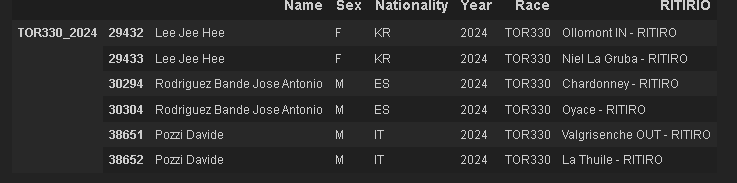

#### Solution
Do nothing. Dont reattach it to the pivoted dataset. It is useless anyway. Only 140 runners were marked as retired, very far from the DNF number.  

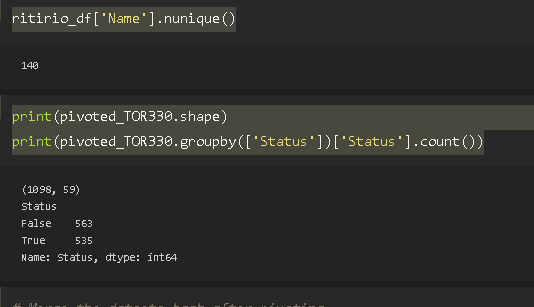

In [22]:
ritirio_df = TOR330[~(TOR330['RITIRIO'] == '')]
# ritirio_df = ritirio_df[['Bib', 'RITIRIO']]
ritirio_df.head()

,,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO,new_Time


,,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO,new_Time


In [23]:
# Get a list of duplicate names
duplicate_list = ritirio_df['Name'][ritirio_df['Name'].duplicated()].unique()

# Filter the DataFrame to only rows where 'Name' is in the duplicate list
duplicates_in_dataframe = ritirio_df[ritirio_df['Name'].isin(duplicate_list)]

# Display or process the result
duplicates_in_dataframe[['Name', 'Sex', 'Nationality', 'Year', 'Race', 'RITIRIO' ]]


,,Name,Sex,Nationality,Year,Race,RITIRIO


,,Name,Sex,Nationality,Year,Race,RITIRIO


In [24]:
ritirio_df['Name'].nunique()

0

0

In [25]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(712, 58)
Status
False    280
True     432
Name: Status, dtype: int64
(712, 58)
Status
False    280
True     432
Name: Status, dtype: int64


In [26]:
# # Merge the datsets back after pivoting
# pivoted_TOR330 = pivoted_TOR330.merge(
#     ritirio_df[['Bib', 'RITIRIO']].drop_duplicates(),  # Ensure no duplicates in 'Bib' and 'RITIRIO'
#     on='Bib',
#     how='left'
# )

In [27]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(712, 58)
Status
False    280
True     432
Name: Status, dtype: int64
(712, 58)
Status
False    280
True     432
Name: Status, dtype: int64


### Dealing with Anomalies

Several anomalies were spotted with the finish times. 

Some runners had a timestamp at the finish line, yet failed to be scanned Ollomont IN or OUT or any other refugee or checkpoints on the last stage. 


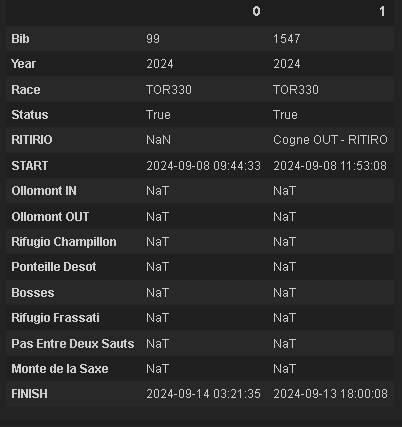

SOLUTION: change their status to FALSE and remove the timestamp

### 2023 Solution
9 participants were incorrectly labelled as finished!
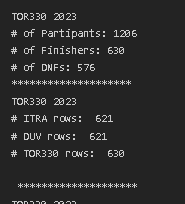

8 participants were identified as labelled finished and had a finish time but missed all stage 7 checkpoints
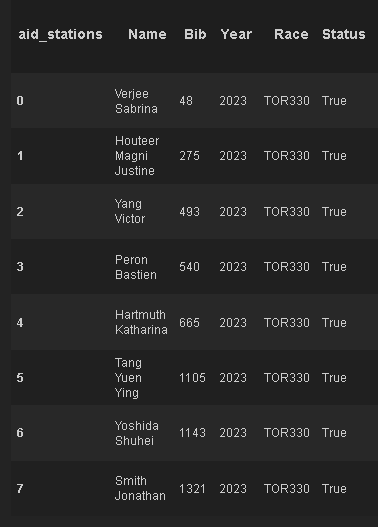



### 2024 Solution

In [28]:
# Looking for runners who have FINISHED< BUT have missing values for all last 3 checkpoints!
anomalies_df = pivoted_TOR330[(pivoted_TOR330['Status'] == True) &
               (pivoted_TOR330['Bosses'].isna()) &                
               (pivoted_TOR330['Rifugio Frassati'].isna()) & 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) &
               (pivoted_TOR330['Monte de la Saxe'].isna())]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status',  'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH']].reset_index(drop = True)

### Conclusion: Easily visible that there are several other places that have missing values 

aid_stations,Name,Bib,Year,Race,Status,START,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Mcdermott David,668,2021,TOR330,True,2021-09-12 11:49:26,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2021-09-18 15:26:27


aid_stations,Name,Bib,Year,Race,Status,START,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Mcdermott David,668,2021,TOR330,True,2021-09-12 11:49:26,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2021-09-18 15:26:27


In [29]:
# EXECUTING SOLUTION
for name in anomalies_df['Name'].unique():  

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False

In [30]:
# Looking for runners who have FINISHED< BUT dont haave a finish time!
anomalies_df = pivoted_TOR330[((pivoted_TOR330['Status'] == True) 
#                               &(pivoted_TOR330['FINISH'] == pd.NaT) 
                              )&
                              
                              (
                                  (pivoted_TOR330['Bosses'].isna()) |                
               (pivoted_TOR330['Rifugio Frassati'].isna()) | 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) |
               (pivoted_TOR330['Monte de la Saxe'].isna())
                              )]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status',  'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH']]

### Conclusion: Easily visible that there are several other places that have missing values 

aid_stations,Name,Bib,Year,Race,Status,START,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
157,Colle Franco,1,2021,TOR330,True,2021-09-12 09:41:58,2021-09-14 19:04:24,2021-09-14 19:04:37,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57
567,Roncato Alessandro,60,2021,TOR330,True,2021-09-11 19:50:18,2021-09-15 18:43:20,2021-09-15 19:43:46,2021-09-15 21:42:06,2021-09-15 23:49:49,2021-09-16 02:06:47,2021-09-16 06:01:31,NaT,2021-09-16 11:05:30,2021-09-16 12:11:37
53,Beschet Vivien,71,2021,TOR330,True,2021-09-11 20:19:38,2021-09-16 20:22:16,2021-09-16 23:23:37,2021-09-17 01:22:57,2021-09-17 03:56:02,NaT,2021-09-17 10:21:57,2021-09-17 12:22:35,2021-09-17 14:17:45,2021-09-17 15:22:10
590,Santamaria Lorenzo,98,2021,TOR330,True,2021-09-12 09:43:22,2021-09-16 18:25:24,2021-09-16 23:40:51,2021-09-17 01:41:41,2021-09-17 04:13:00,2021-09-17 06:35:15,NaT,2021-09-17 12:30:56,2021-09-17 14:31:41,2021-09-17 15:24:48
359,Lambert Mathieu,112,2021,TOR330,True,2021-09-11 20:09:24,2021-09-17 12:41:12,2021-09-17 14:13:21,2021-09-17 16:15:23,2021-09-17 18:31:06,2021-09-17 22:11:40,2021-09-18 02:00:28,NaT,2021-09-18 07:44:47,2021-09-18 08:52:34
278,Giagkou Petros,113,2021,TOR330,True,2021-09-11 20:17:48,2021-09-17 12:04:38,2021-09-17 14:19:55,2021-09-17 16:29:33,2021-09-17 18:59:07,2021-09-17 21:16:27,2021-09-18 01:50:49,NaT,2021-09-18 07:30:59,2021-09-18 08:52:27
416,Mascarin Marc,173,2021,TOR330,True,2021-09-11 20:14:22,2021-09-17 00:10:03,2021-09-17 03:20:38,2021-09-17 05:24:06,2021-09-17 08:08:20,2021-09-17 11:17:00,2021-09-17 14:23:50,2021-09-17 16:21:12,NaT,2021-09-17 19:32:16
617,Slanzi Gianluca,178,2021,TOR330,True,2021-09-11 20:21:43,2021-09-17 05:25:37,2021-09-17 06:32:06,2021-09-17 09:33:38,2021-09-17 12:04:12,2021-09-17 14:04:59,2021-09-17 17:45:59,NaT,2021-09-17 22:21:26,2021-09-17 23:42:23
169,Corsini Valerio,189,2021,TOR330,True,2021-09-11 20:20:32,2021-09-17 07:01:25,2021-09-17 10:07:41,2021-09-17 11:58:11,2021-09-17 13:49:21,2021-09-17 15:48:37,2021-09-17 18:50:56,NaT,2021-09-17 23:37:36,2021-09-18 00:55:00
132,Catti Lorenzo,211,2021,TOR330,True,2021-09-12 09:43:19,2021-09-16 18:24:54,2021-09-16 23:41:17,2021-09-17 01:41:15,2021-09-17 04:10:05,2021-09-17 06:35:08,2021-09-17 09:49:08,NaT,2021-09-17 14:29:01,2021-09-17 15:10:02


aid_stations,Name,Bib,Year,Race,Status,START,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
157,Colle Franco,1,2021,TOR330,True,2021-09-12 09:41:58,2021-09-14 19:04:24,2021-09-14 19:04:37,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57
567,Roncato Alessandro,60,2021,TOR330,True,2021-09-11 19:50:18,2021-09-15 18:43:20,2021-09-15 19:43:46,2021-09-15 21:42:06,2021-09-15 23:49:49,2021-09-16 02:06:47,2021-09-16 06:01:31,NaT,2021-09-16 11:05:30,2021-09-16 12:11:37
53,Beschet Vivien,71,2021,TOR330,True,2021-09-11 20:19:38,2021-09-16 20:22:16,2021-09-16 23:23:37,2021-09-17 01:22:57,2021-09-17 03:56:02,NaT,2021-09-17 10:21:57,2021-09-17 12:22:35,2021-09-17 14:17:45,2021-09-17 15:22:10
590,Santamaria Lorenzo,98,2021,TOR330,True,2021-09-12 09:43:22,2021-09-16 18:25:24,2021-09-16 23:40:51,2021-09-17 01:41:41,2021-09-17 04:13:00,2021-09-17 06:35:15,NaT,2021-09-17 12:30:56,2021-09-17 14:31:41,2021-09-17 15:24:48
359,Lambert Mathieu,112,2021,TOR330,True,2021-09-11 20:09:24,2021-09-17 12:41:12,2021-09-17 14:13:21,2021-09-17 16:15:23,2021-09-17 18:31:06,2021-09-17 22:11:40,2021-09-18 02:00:28,NaT,2021-09-18 07:44:47,2021-09-18 08:52:34
278,Giagkou Petros,113,2021,TOR330,True,2021-09-11 20:17:48,2021-09-17 12:04:38,2021-09-17 14:19:55,2021-09-17 16:29:33,2021-09-17 18:59:07,2021-09-17 21:16:27,2021-09-18 01:50:49,NaT,2021-09-18 07:30:59,2021-09-18 08:52:27
416,Mascarin Marc,173,2021,TOR330,True,2021-09-11 20:14:22,2021-09-17 00:10:03,2021-09-17 03:20:38,2021-09-17 05:24:06,2021-09-17 08:08:20,2021-09-17 11:17:00,2021-09-17 14:23:50,2021-09-17 16:21:12,NaT,2021-09-17 19:32:16
617,Slanzi Gianluca,178,2021,TOR330,True,2021-09-11 20:21:43,2021-09-17 05:25:37,2021-09-17 06:32:06,2021-09-17 09:33:38,2021-09-17 12:04:12,2021-09-17 14:04:59,2021-09-17 17:45:59,NaT,2021-09-17 22:21:26,2021-09-17 23:42:23
169,Corsini Valerio,189,2021,TOR330,True,2021-09-11 20:20:32,2021-09-17 07:01:25,2021-09-17 10:07:41,2021-09-17 11:58:11,2021-09-17 13:49:21,2021-09-17 15:48:37,2021-09-17 18:50:56,NaT,2021-09-17 23:37:36,2021-09-18 00:55:00
132,Catti Lorenzo,211,2021,TOR330,True,2021-09-12 09:43:19,2021-09-16 18:24:54,2021-09-16 23:41:17,2021-09-17 01:41:15,2021-09-17 04:10:05,2021-09-17 06:35:08,2021-09-17 09:49:08,NaT,2021-09-17 14:29:01,2021-09-17 15:10:02


In [31]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2021
# of Partipants: 712
# of Finishers: 431
# of DNFs: 281
********************
TOR330 2021
# ITRA rows:  431
# DUV rows:  431
# TOR330 rows:  431

 ********************
TOR330 2021
# of Partipants: 712 

TOR330 2021
# of Partipants: 712
# of Finishers: 431
# of DNFs: 281
********************
TOR330 2021
# ITRA rows:  431
# DUV rows:  431
# TOR330 rows:  431

 ********************
TOR330 2021
# of Partipants: 712 

Status
False    281
True     431
Name: Status, dtype: int64
********************
Status
False    281
True     431
Name: Status, dtype: int64
********************


### Start Line Issues

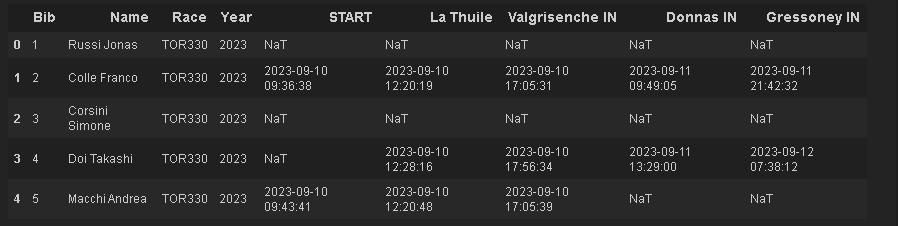

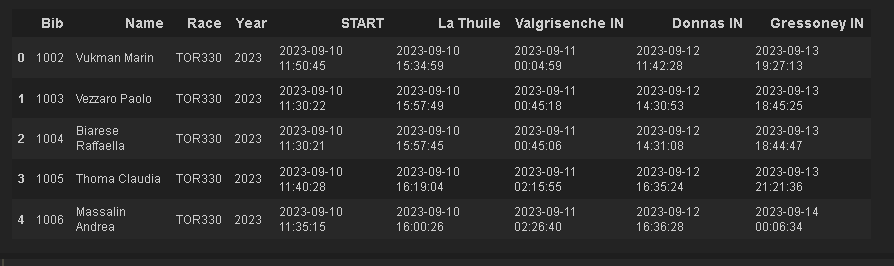

START times are all over the place and this is a MAJOR issue! 
It is important because if the start is not cleaned, it will affet the race finishing time and all the durations in between. 


#### SOLUTION
1) Made a new TIME column from DUV dates

2) added start times based on the wave (based on the bib)

##### Reading in TORX dates extracted from DUV

In [32]:
file = f'TORX DUV dates/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


In [33]:
dates_duv_df[dates_duv_df['Race'] =='TOR330']

,Race,Year,Start Date
7,TOR330,2023,2023-09-10 10:00:00
8,TOR330,2021,2021-09-12 10:00:00
9,TOR330,2017,2017-09-10 10:00:00
10,TOR330,2024,2024-09-08 10:00:00
11,TOR330,2013,2013-09-08 10:00:00
12,TOR330,2022,2022-09-11 10:00:00
13,TOR330,2014,2014-09-07 10:00:00
14,TOR330,2019,2019-09-08 10:00:00
15,TOR330,2018,2018-09-09 10:00:00
16,TOR330,2016,2016-09-11 10:00:00


,Race,Year,Start Date
7,TOR330,2023,2023-09-10 10:00:00
8,TOR330,2021,2021-09-12 10:00:00
9,TOR330,2017,2017-09-10 10:00:00
10,TOR330,2024,2024-09-08 10:00:00
11,TOR330,2013,2013-09-08 10:00:00
12,TOR330,2022,2022-09-11 10:00:00
13,TOR330,2014,2014-09-07 10:00:00
14,TOR330,2019,2019-09-08 10:00:00
15,TOR330,2018,2018-09-09 10:00:00
16,TOR330,2016,2016-09-11 10:00:00


### Adding dates into TOR330

In [34]:
# making sure both columns are years!
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



(712, 58)
(712, 59)
(712, 58)
(712, 59)


In [35]:
# Following the assumption that every bib prior to 1001 starts at 10:00:00
pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

# Following the assumption that every bib from 1001 onwards starts at 12:00:00
pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] <= 1001, 
        'Wave1', 
        'Wave2')

In [36]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']< 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1,Colle Franco,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:13:12,2021-09-12 17:01:28,2021-09-13 10:28:35,2021-09-13 23:21:37
1,2,Restorp Petter,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:20:58,2021-09-12 17:27:05,2021-09-13 12:27:22,2021-09-14 03:14:35
2,3,Macchi Andrea,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:21:22,2021-09-12 17:17:39,NaT,NaT
3,4,Cavallo Giuliano,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:30:57,NaT,NaT,NaT
4,5,Corsini Simone,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:29:28,2021-09-12 18:08:21,2021-09-13 14:59:56,2021-09-14 08:44:27


,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1,Colle Franco,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:13:12,2021-09-12 17:01:28,2021-09-13 10:28:35,2021-09-13 23:21:37
1,2,Restorp Petter,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:20:58,2021-09-12 17:27:05,2021-09-13 12:27:22,2021-09-14 03:14:35
2,3,Macchi Andrea,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:21:22,2021-09-12 17:17:39,NaT,NaT
3,4,Cavallo Giuliano,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:30:57,NaT,NaT,NaT
4,5,Corsini Simone,TOR330,2021,2021-09-12 10:00:00,2021-09-12 12:29:28,2021-09-12 18:08:21,2021-09-13 14:59:56,2021-09-14 08:44:27


In [37]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']> 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN


,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN


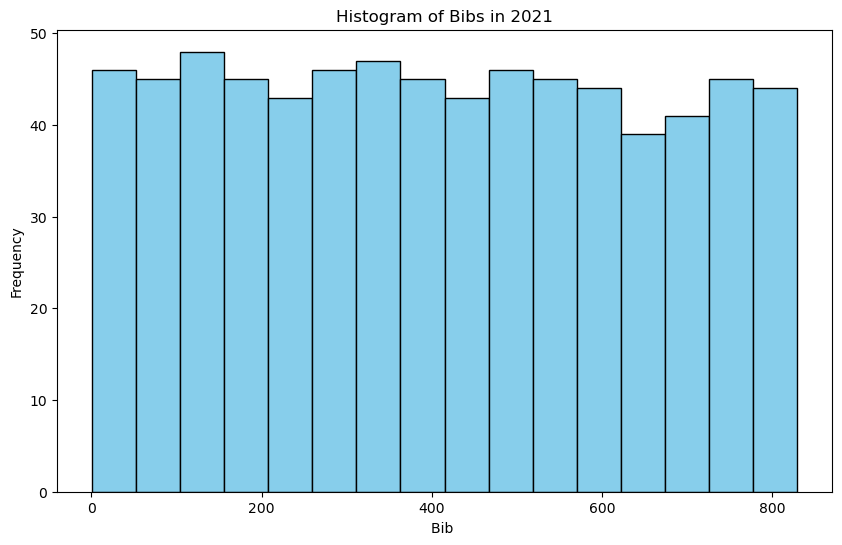

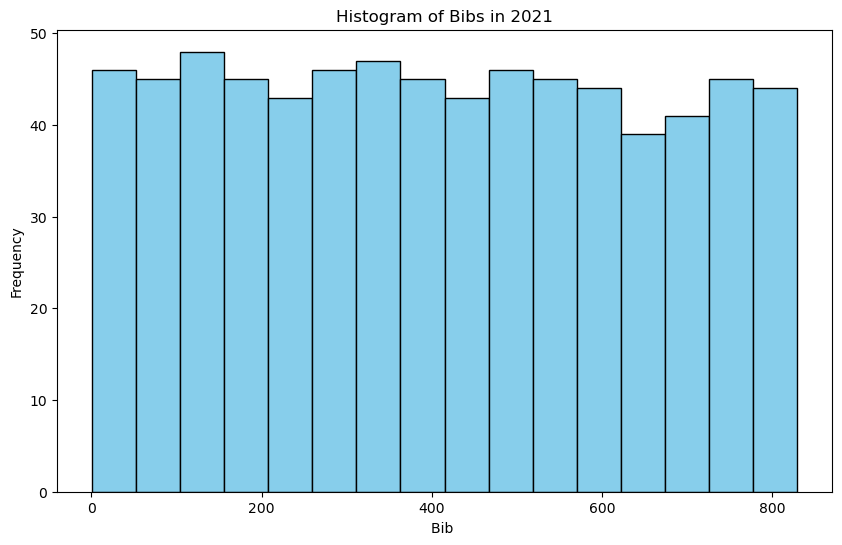

In [38]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pivoted_TOR330_dates['Bib'], bins=16, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Bibs in {year}')
plt.xlabel('Bib ')
plt.ylabel('Frequency')
plt.show()

In [39]:
### WHich wave is more likely to finish? 
### Wave 1 seems to have way more finishers - they do have a higher ITRA score, meaning that they are more
### experienced and stronger than Wave 2..
pivoted_TOR330_dates.groupby(['Wave', 'Status'])['Status'].size()

Wave   Status
Wave1  False     281
       True      431
Name: Status, dtype: int64

Wave   Status
Wave1  False     281
       True      431
Name: Status, dtype: int64

### Calculating Duration - THE MOST IMPORTANT!

In [40]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')


Processing column: Duration
0     2 days 18:43:57
366   2 days 21:03:00
1     3 days 04:36:00
9     3 days 09:31:00
4     3 days 10:45:52
Name: Duration, dtype: timedelta64[ns]
Processing column: Duration
0     2 days 18:43:57
366   2 days 21:03:00
1     3 days 04:36:00
9     3 days 09:31:00
4     3 days 10:45:52
Name: Duration, dtype: timedelta64[ns]


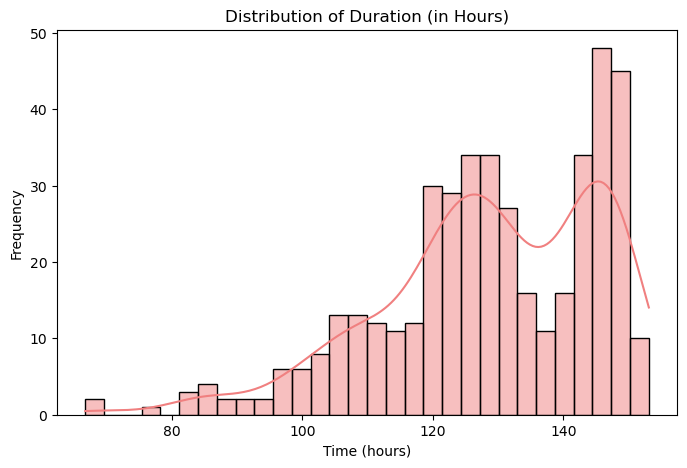

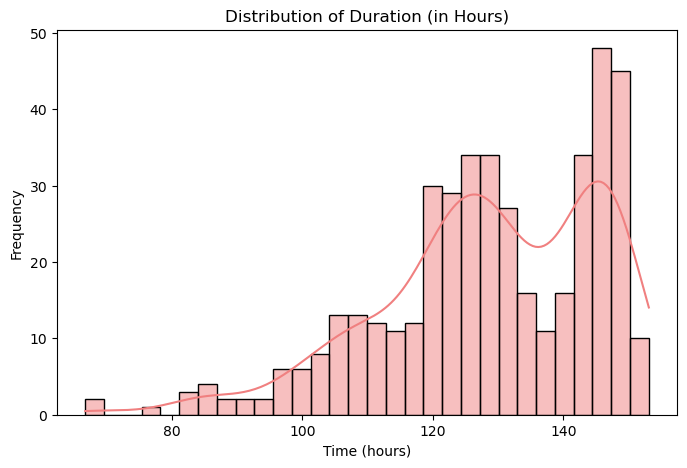

In [41]:
print(f"Processing column: Duration")
print(pivoted_TOR330_dates['Duration'].head())


pivoted_TOR330_dates['Duration']
# Convert to timedelta and get total hours (handling NaT)
pivoted_TOR330_dates['Duration_hours'] = pd.to_timedelta(
    pivoted_TOR330_dates['Duration'], errors='coerce'
).dt.total_seconds() / 3600  # Convert seconds to hours

# Drop NaN values for histogram visualization
data_to_plot = pivoted_TOR330_dates['Duration_hours'].dropna()

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_to_plot, kde=True, bins=30, color="lightcoral")
plt.ticklabel_format(style='plain', axis='x')
plt.title(f"Distribution of Duration (in Hours)")
plt.xlabel("Time (hours)")
plt.ylabel("Frequency")
plt.show()


In [42]:
# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 
        'Category', 'Status','Wave', 'Duration', # MOVING DURATION CLOSER TO THE START SO I CAN SEE IT!
        
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
         'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
        'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace', 'Bruson Arp', 
         'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]

### Checking accuracy of the Duration calculation

Because of issues with Start Date, it was thought that it would be a good idea to try and compare the DUV and ITRA duration time to establish accuracy of the calculation...

There are issues with the names, so some will be not be successfully merged.

In [43]:
# print(pivoted_TOR330_dates['Duration'][pivoted_TOR330_dates['Name'].str.contains('Jonina')])
# # print(TORX_duv_df['Performance'][TORX_duv_df['Name'].str.contains('Jonina')])
# # Finished in 144:46:43 hours and 

In [44]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2021
# of Partipants: 712
# of Finishers: 431
# of DNFs: 281
********************
TOR330 2021
# ITRA rows:  431
# DUV rows:  431
# TOR330 rows:  431

 ********************
TOR330 2021
# of Partipants: 712 

Status
False    281
True     431
Name: Status, dtype: int64
********************
TOR330 2021
# of Partipants: 712
# of Finishers: 431
# of DNFs: 281
********************
TOR330 2021
# ITRA rows:  431
# DUV rows:  431
# TOR330 rows:  431

 ********************
TOR330 2021
# of Partipants: 712 

Status
False    281
True     431
Name: Status, dtype: int64
********************


## extracting DNF and FInisher's for more cleaning!

In [45]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[
                        # extracting runners whose status is True (Finished)
                        (pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()


In [46]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[
                    # selecting all rows that DNFed
                    (pivoted_TOR330_dates['Status'] == False) & # AND
                    # selecting all rows where FINISH does not have a time
                    (pivoted_TOR330_dates['FINISH'].isna())]

In [47]:
print(pivoted_TOR330_dates_noDNF.shape)
print(pivoted_TOR330_dates_DNF.shape)
print('MUST ADD UP TO:')
print(pivoted_TOR330_dates.shape)

(431, 61)
(281, 60)
MUST ADD UP TO:
(712, 60)
(431, 61)
(281, 60)
MUST ADD UP TO:
(712, 60)


### FINISHER'S Missing Timestamps
From time to time, timestamps are missing, even for finishers. Here is the missing values count for all finishers. 

THis is could be for several issues:
1) Participant's Fatigue - they forget to ask to be scanned

2) Volunteer's Fatigue - they forget to scan participants /  they thought they had already scanned the runer

3) Technology Failure - something goes wrong... ?
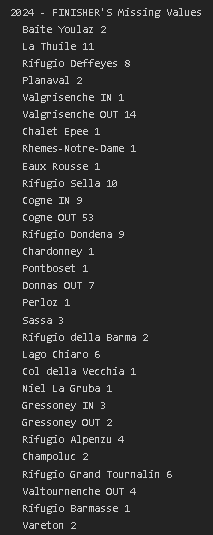

This is just a screenshot, more can be seen below!

### DNFs 

In [48]:
#### What missing values are there? 
### Some missing value is okay due to the fact that they DNFed so they wont have a timestamp
pivoted_TOR330_dates_DNF.isna().sum()

Name                         0
Bib                          0
Sex                          0
Nationality                  0
Year                         0
Race                         0
Category                     0
Status                       0
Wave                         0
Duration                   281
new_Start Date               0
Baite Youlaz                 5
La Thuile                    2
Rifugio Deffeyes             9
Planaval                    31
Valgrisenche IN             34
Valgrisenche OUT            50
Chalet Epee                 59
Rhemes-Notre-Dame           63
Eaux Rousse                 89
Rifugio Sella              113
Cogne IN                   121
Cogne OUT                  122
Goilles                    145
Rifugio Dondena            149
Chardonney                 148
Pontboset                  155
Donnas IN                  154
Donnas OUT                 159
Perloz                     163
Sassa                      170
Rifugio Coda               169
Rifugio 

Name                         0
Bib                          0
Sex                          0
Nationality                  0
Year                         0
Race                         0
Category                     0
Status                       0
Wave                         0
Duration                   281
new_Start Date               0
Baite Youlaz                 5
La Thuile                    2
Rifugio Deffeyes             9
Planaval                    31
Valgrisenche IN             34
Valgrisenche OUT            50
Chalet Epee                 59
Rhemes-Notre-Dame           63
Eaux Rousse                 89
Rifugio Sella              113
Cogne IN                   121
Cogne OUT                  122
Goilles                    145
Rifugio Dondena            149
Chardonney                 148
Pontboset                  155
Donnas IN                  154
Donnas OUT                 159
Perloz                     163
Sassa                      170
Rifugio Coda               169
Rifugio 

### What is the last place that DNFers reached?

In [49]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
#     return None  # In case all columns are blank

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)


In [50]:
pivoted_TOR330_dates = pivoted_TOR330_dates[['Name', 'Bib',
                                                     'Sex', 'Nationality',
                                                     'Year', 'Race', 
                                                     'Category', 'Status', 'Wave', 'Duration', 
                                                      'Retired', # putting retired at the from and not the back
                                                     'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
       'Bruson Arp',   'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

In [51]:
# creating a dataset to examine DNFs in the excel
pivoted_TOR330_dates_DNF_for_excel = pivoted_TOR330_dates_DNF.copy().drop(columns=['Sex', 'Nationality',
                                                          'Category', 'Status', 
                                                          'Wave', 'Duration'])    

# pivoted_TOR330_dates_DNF_for_excel.to_excel(f'{race} Data/5. Clean Data for Data Visualisation/{race}_{year}_DNF_df.xlsx', index = False)


In [52]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == True].head(1)

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Colle Franco,1,M,IT,2021,TOR330,V1,True,Wave1,2 days 18:43:57,...,NaT,2021-09-14 19:04:24,2021-09-14 19:04:37,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57


,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Colle Franco,1,M,IT,2021,TOR330,V1,True,Wave1,2 days 18:43:57,...,NaT,2021-09-14 19:04:24,2021-09-14 19:04:37,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57


### Issues with Last location Detected
Some people who too far of a distance between last lifebase /  refuge / checkpoint for it to be an accurate representation of their last location.

2021
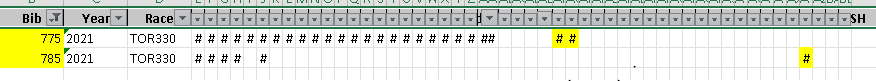

2023
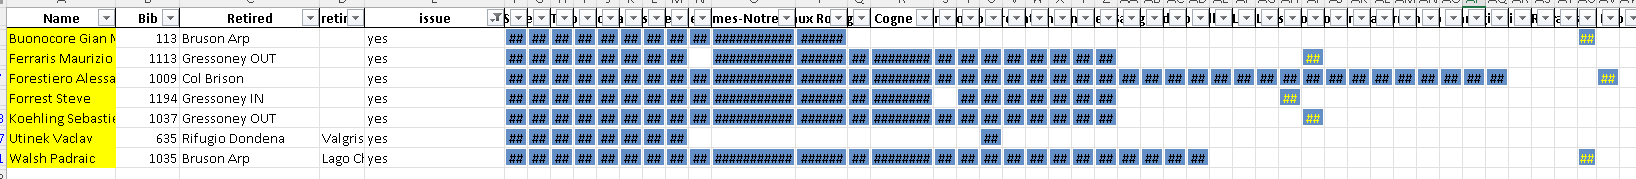

2024

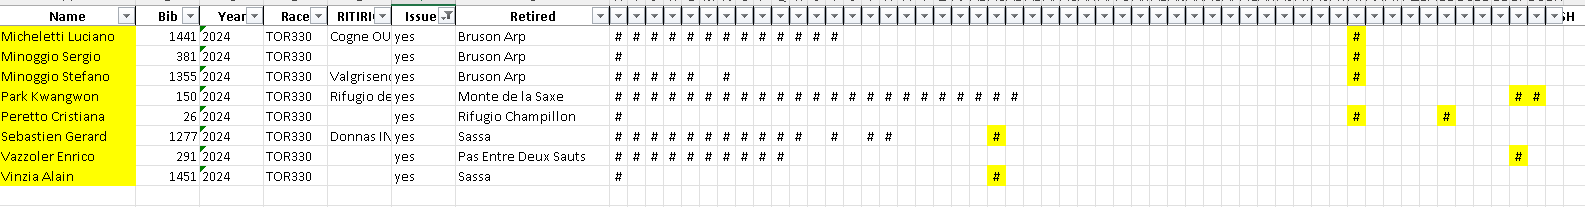

##### Solution
Create a loop that would clean those timestamps.

In [53]:
try:
    if year == '2023':

        names_that_DNFed_and_then_popped_up_miles_away =['Utinek Vaclav', 'Walsh Padraic',
                                                        'Ferraris Maurizio', 
    # 'Buonocore Gian Mario', 'Forestiero Alessandro', ## Have 2 timestamps of time travel
                                                         'Forrest Steve','Koehling Sebastien'
                                                        ]
        retired_list = list(pivoted_TOR330_dates['Retired'][
            pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())
        print(retired_list)

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            retired_column = row['Retired']  # Get the column name in 'Retired'


            if retired_column in retired_list:
                pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        # Prepending 'Name' and 'Bib' to the list
        retired_list = ['Name', 'Bib'] + retired_list  + ['Retired']
        print(retired_list)

    elif year == '2024':
        names_that_DNFed_and_then_popped_up_miles_away =['Micheletti Luciano', 'Minoggio Sergio','Minoggio Stefano', 
                                                        'Park Kwangwon',  ## Has 2 time teleportation 
                                                        'Peretto Cristiana', ## Has 2 time teleportation 
                                                        'Sebastien Gerard', 'Vazzoler Enrico', 'Vinzia Alain']

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            # Get the column name in 'Retired'
            retired_column = row['Retired']

            retired_list = list(pivoted_TOR330_dates['Retired'][
                pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())

            if row['Name'] == 'Park Kwangwon':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Pas Entre Deux Sauts'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Monte de la Saxe'] = pd.NaT

            elif row['Name'] == 'Peretto Cristiana':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Rifugio Champillon'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Bruson Arp'] = pd.NaT

            else:

                if retired_column in retired_list:
                    pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        retired_list = ['Name', 'Bib'] + retired_list + ['Retired']
        print(retired_list)
    elif year == '2021':

        names_that_DNFed_and_then_popped_up_miles_away =['Guillaume Adamczyk', 
                                                         'Andreu Casademont Roger']
        retired_list = list(pivoted_TOR330_dates['Retired'][
            pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())
        
        if row['Name'] == 'Guillaume Adamczyk':
                # Has 2 cases of teletransportation
            pivoted_TOR330_dates.at[index, 'Gressoney IN'] = pd.NaT
            pivoted_TOR330_dates.at[index, 'Gressoney OUT'] = pd.NaT
        
        elif row['Name'] == 'Andreu Casademont Roger':
                # Has 2 cases of teletransportation
            pivoted_TOR330_dates.at[index, 'Rifugio Frassati'] = pd.NaT

        # Prepending 'Name' and 'Bib' to the list
        retired_list = ['Name', 'Bib'] + retired_list  + ['Retired']
        print(retired_list)

     # Display the updated DataFrame
    pivoted_TOR330_dates[retired_list][pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]

except:
    pass

In [54]:
# Dropping the column retired otherwise it is going to think that RETIRED is the last column
pivoted_TOR330_dates = pivoted_TOR330_dates.drop(columns=['Retired'])    

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)

In [55]:
pivoted_TOR330_dates.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired
0,Colle Franco,1,M,IT,2021,TOR330,V1,True,Wave1,2 days 18:43:57,...,2021-09-14 19:04:24,2021-09-14 19:04:37,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57,NaN
366,Jonas Russi,417,M,CH,2021,TOR330,SEN,True,Wave1,2 days 21:03:00,...,2021-09-14 19:04:51,2021-09-14 19:17:16,2021-09-14 20:49:04,2021-09-14 22:30:00,2021-09-14 23:58:14,2021-09-15 02:23:02,2021-09-15 04:17:37,2021-09-15 06:07:54,2021-09-15 07:03:00,NaN
1,Restorp Petter,2,M,FR,2021,TOR330,V1,True,Wave1,3 days 04:36:00,...,2021-09-15 00:57:24,2021-09-15 01:57:12,2021-09-15 03:46:36,2021-09-15 05:53:00,2021-09-15 07:20:56,2021-09-15 10:16:17,2021-09-15 12:16:14,2021-09-15 13:43:37,2021-09-15 14:36:00,NaN
9,Picinali Luca,10,M,IT,2021,TOR330,V1,True,Wave1,3 days 09:31:00,...,2021-09-15 09:07:29,2021-09-15 10:19:36,2021-09-15 11:50:18,2021-09-15 13:00:27,2021-09-15 14:19:18,2021-09-15 16:16:28,2021-09-15 17:43:40,2021-09-15 18:55:51,2021-09-15 19:31:00,NaN
4,Corsini Simone,5,M,IT,2021,TOR330,SEN,True,Wave1,3 days 10:45:52,...,2021-09-15 09:02:15,2021-09-15 10:18:37,2021-09-15 11:56:13,2021-09-15 13:19:51,2021-09-15 14:32:33,2021-09-15 17:09:29,2021-09-15 18:49:41,2021-09-15 20:02:18,2021-09-15 20:45:52,NaN


,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired
0,Colle Franco,1,M,IT,2021,TOR330,V1,True,Wave1,2 days 18:43:57,...,2021-09-14 19:04:24,2021-09-14 19:04:37,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57,NaN
366,Jonas Russi,417,M,CH,2021,TOR330,SEN,True,Wave1,2 days 21:03:00,...,2021-09-14 19:04:51,2021-09-14 19:17:16,2021-09-14 20:49:04,2021-09-14 22:30:00,2021-09-14 23:58:14,2021-09-15 02:23:02,2021-09-15 04:17:37,2021-09-15 06:07:54,2021-09-15 07:03:00,NaN
1,Restorp Petter,2,M,FR,2021,TOR330,V1,True,Wave1,3 days 04:36:00,...,2021-09-15 00:57:24,2021-09-15 01:57:12,2021-09-15 03:46:36,2021-09-15 05:53:00,2021-09-15 07:20:56,2021-09-15 10:16:17,2021-09-15 12:16:14,2021-09-15 13:43:37,2021-09-15 14:36:00,NaN
9,Picinali Luca,10,M,IT,2021,TOR330,V1,True,Wave1,3 days 09:31:00,...,2021-09-15 09:07:29,2021-09-15 10:19:36,2021-09-15 11:50:18,2021-09-15 13:00:27,2021-09-15 14:19:18,2021-09-15 16:16:28,2021-09-15 17:43:40,2021-09-15 18:55:51,2021-09-15 19:31:00,NaN
4,Corsini Simone,5,M,IT,2021,TOR330,SEN,True,Wave1,3 days 10:45:52,...,2021-09-15 09:02:15,2021-09-15 10:18:37,2021-09-15 11:56:13,2021-09-15 13:19:51,2021-09-15 14:32:33,2021-09-15 17:09:29,2021-09-15 18:49:41,2021-09-15 20:02:18,2021-09-15 20:45:52,NaN


###  Unpredictable Weather of 2022 
In 2022, due to the weather,  the race directors decided to stop the race at Bosses and Refuge Frassati.  

In [56]:
pivoted_TOR330_dates['Status1'] = pivoted_TOR330_dates['Status'].astype('str')
# print(pivoted_TOR330_dates['Status1'].unique())

for year in years:
    if year == '2022':
        # Update 'Status1' for year 2022
        pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ] = pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ].str.replace('True', 'Finished')

        # For finishers at Bosses
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ].str.replace('False', 'Finished at Bosses')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Finished at Rifugio Frassati')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Finished at Rifugio Frassati')

        
        
        # All other DNFs
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ].str.replace('False', 'DNFs')
        
        
        
        
        
    else:
        
        print(year)
        # Update 'Status1' for years other than 2022
        pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1'] = (
            pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1']
            .str.replace('True', 'Finished')
            .str.replace('False', 'DNF')
        )
        print(pivoted_TOR330_dates['Status1'].unique())


2021
['Finished' 'DNF']
2021
['Finished' 'DNF']


In [57]:
pivoted_TOR330_dates['Status1'].unique()

array(['Finished', 'DNF'], dtype=object)

array(['Finished', 'DNF'], dtype=object)

In [58]:
counting_finish_DNF_dataset(pivoted_TOR330_dates)
find_out_the_rows_difference_between_datasets(pivoted_TOR330_dates)
pivoted_TOR330_dates.groupby('Status1')['Status1'].count()

TOR330 2021
# of Partipants: 712
# of Finishers: 431
# of DNFs: 281
********************
TOR330 2021
# ITRA rows:  431
# DUV rows:  431
# TOR330 rows:  431

 ********************
TOR330 2021
# of Partipants: 712
# of Finishers: 431
# of DNFs: 281
********************
TOR330 2021
# ITRA rows:  431
# DUV rows:  431
# TOR330 rows:  431

 ********************


Status1
DNF         281
Finished    431
Name: Status1, dtype: int64

Status1
DNF         281
Finished    431
Name: Status1, dtype: int64

In [59]:
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

### Where did the DNFs occur?

In [60]:
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' IN', '')
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' OUT', '')

In [61]:
Stage1 = ['Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
             'Planaval', 'Valgrisenche']
Stage2 = [ 'Chalet Epee', 'Rhemes-Notre-Dame',
            'Eaux Rousse', 'Rifugio Sella', 'Cogne']

Stage3 = [ 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas']
Stage4  = ['Perloz', 'Sassa', 'Rifugio Coda',
            'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
            'Niel La Gruba', 'Loo', 'Gressoney']

Stage5 = ['Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche'] 

Stage6 = [ 'Vareton', 'Rifugio Barmasse',
            'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
            'Bruson Arp',   'Ollomont']
        
Stage7 = [ 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
            'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
            'FINISH']

# finding the low / high season by date
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage1), 'Retired_Stage'] = 'Stage 1'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage2), 'Retired_Stage'] = 'Stage 2'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage3), 'Retired_Stage'] = 'Stage 3'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage4), 'Retired_Stage'] = 'Stage 4'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage5), 'Retired_Stage'] = 'Stage 5'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage6), 'Retired_Stage'] = 'Stage 6'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage7), 'Retired_Stage'] = 'Stage 7'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Retired_Stage'] = 'DNS'
pivoted_TOR330_dates[(pivoted_TOR330_dates['Retired'].isnull())]

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Stage
0,Colle Franco,1,M,IT,2021,TOR330,V1,True,Wave1,2 days 18:43:57,...,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57,NaN,Finished,NaN
366,Jonas Russi,417,M,CH,2021,TOR330,SEN,True,Wave1,2 days 21:03:00,...,2021-09-14 20:49:04,2021-09-14 22:30:00,2021-09-14 23:58:14,2021-09-15 02:23:02,2021-09-15 04:17:37,2021-09-15 06:07:54,2021-09-15 07:03:00,NaN,Finished,NaN
1,Restorp Petter,2,M,FR,2021,TOR330,V1,True,Wave1,3 days 04:36:00,...,2021-09-15 03:46:36,2021-09-15 05:53:00,2021-09-15 07:20:56,2021-09-15 10:16:17,2021-09-15 12:16:14,2021-09-15 13:43:37,2021-09-15 14:36:00,NaN,Finished,NaN
9,Picinali Luca,10,M,IT,2021,TOR330,V1,True,Wave1,3 days 09:31:00,...,2021-09-15 11:50:18,2021-09-15 13:00:27,2021-09-15 14:19:18,2021-09-15 16:16:28,2021-09-15 17:43:40,2021-09-15 18:55:51,2021-09-15 19:31:00,NaN,Finished,NaN
4,Corsini Simone,5,M,IT,2021,TOR330,SEN,True,Wave1,3 days 10:45:52,...,2021-09-15 11:56:13,2021-09-15 13:19:51,2021-09-15 14:32:33,2021-09-15 17:09:29,2021-09-15 18:49:41,2021-09-15 20:02:18,2021-09-15 20:45:52,NaN,Finished,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Scouflaire Helene,582,F,FR,2021,TOR330,SEN,True,Wave1,6 days 07:09:42,...,2021-09-17 22:39:54,2021-09-18 01:30:57,2021-09-18 04:04:25,2021-09-18 09:18:34,2021-09-18 13:14:49,2021-09-18 15:23:32,2021-09-18 17:09:42,NaN,Finished,NaN
583,Pierrick Daniel,676,M,FR,2021,TOR330,V1,True,Wave1,6 days 07:09:42,...,2021-09-17 22:42:15,2021-09-18 01:58:52,2021-09-18 04:43:18,2021-09-18 09:18:02,2021-09-18 13:14:07,2021-09-18 15:22:45,2021-09-18 17:09:42,NaN,Finished,NaN
373,Rodrigues Paulo Jorge,425,M,PT,2021,TOR330,V2,True,Wave1,6 days 07:33:21,...,2021-09-17 22:27:05,2021-09-18 02:58:20,2021-09-18 06:44:20,2021-09-18 09:50:19,2021-09-18 13:42:25,2021-09-18 16:24:48,2021-09-18 17:33:21,NaN,Finished,NaN
378,Henrio Erick,431,M,FR,2021,TOR330,V2,True,Wave1,6 days 08:08:03,...,2021-09-17 21:49:39,2021-09-18 01:53:45,2021-09-18 05:21:54,2021-09-18 10:53:24,2021-09-18 14:00:24,2021-09-18 16:55:03,2021-09-18 18:08:03,NaN,Finished,NaN


,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Stage
0,Colle Franco,1,M,IT,2021,TOR330,V1,True,Wave1,2 days 18:43:57,...,2021-09-14 20:49:18,2021-09-14 21:59:00,2021-09-14 23:19:05,2021-09-15 01:19:06,NaT,2021-09-15 04:04:48,2021-09-15 04:43:57,NaN,Finished,NaN
366,Jonas Russi,417,M,CH,2021,TOR330,SEN,True,Wave1,2 days 21:03:00,...,2021-09-14 20:49:04,2021-09-14 22:30:00,2021-09-14 23:58:14,2021-09-15 02:23:02,2021-09-15 04:17:37,2021-09-15 06:07:54,2021-09-15 07:03:00,NaN,Finished,NaN
1,Restorp Petter,2,M,FR,2021,TOR330,V1,True,Wave1,3 days 04:36:00,...,2021-09-15 03:46:36,2021-09-15 05:53:00,2021-09-15 07:20:56,2021-09-15 10:16:17,2021-09-15 12:16:14,2021-09-15 13:43:37,2021-09-15 14:36:00,NaN,Finished,NaN
9,Picinali Luca,10,M,IT,2021,TOR330,V1,True,Wave1,3 days 09:31:00,...,2021-09-15 11:50:18,2021-09-15 13:00:27,2021-09-15 14:19:18,2021-09-15 16:16:28,2021-09-15 17:43:40,2021-09-15 18:55:51,2021-09-15 19:31:00,NaN,Finished,NaN
4,Corsini Simone,5,M,IT,2021,TOR330,SEN,True,Wave1,3 days 10:45:52,...,2021-09-15 11:56:13,2021-09-15 13:19:51,2021-09-15 14:32:33,2021-09-15 17:09:29,2021-09-15 18:49:41,2021-09-15 20:02:18,2021-09-15 20:45:52,NaN,Finished,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Scouflaire Helene,582,F,FR,2021,TOR330,SEN,True,Wave1,6 days 07:09:42,...,2021-09-17 22:39:54,2021-09-18 01:30:57,2021-09-18 04:04:25,2021-09-18 09:18:34,2021-09-18 13:14:49,2021-09-18 15:23:32,2021-09-18 17:09:42,NaN,Finished,NaN
583,Pierrick Daniel,676,M,FR,2021,TOR330,V1,True,Wave1,6 days 07:09:42,...,2021-09-17 22:42:15,2021-09-18 01:58:52,2021-09-18 04:43:18,2021-09-18 09:18:02,2021-09-18 13:14:07,2021-09-18 15:22:45,2021-09-18 17:09:42,NaN,Finished,NaN
373,Rodrigues Paulo Jorge,425,M,PT,2021,TOR330,V2,True,Wave1,6 days 07:33:21,...,2021-09-17 22:27:05,2021-09-18 02:58:20,2021-09-18 06:44:20,2021-09-18 09:50:19,2021-09-18 13:42:25,2021-09-18 16:24:48,2021-09-18 17:33:21,NaN,Finished,NaN
378,Henrio Erick,431,M,FR,2021,TOR330,V2,True,Wave1,6 days 08:08:03,...,2021-09-17 21:49:39,2021-09-18 01:53:45,2021-09-18 05:21:54,2021-09-18 10:53:24,2021-09-18 14:00:24,2021-09-18 16:55:03,2021-09-18 18:08:03,NaN,Finished,NaN


In [62]:
# making sure that I caught all aid stations!!!!
pivoted_TOR330_dates[
    (pivoted_TOR330_dates['Status'] == False) &
    
    (pivoted_TOR330_dates['Retired_Stage'].isnull())
                    ]

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Stage


,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Stage


In [63]:
pivoted_TOR330_dates['Retired_Stage'].unique()

array([nan, 'Stage 2', 'Stage 4', 'Stage 5', 'DNS', 'Stage 3', 'Stage 6',
       'Stage 1', 'Stage 7'], dtype=object)

array([nan, 'Stage 2', 'Stage 4', 'Stage 5', 'DNS', 'Stage 3', 'Stage 6',
       'Stage 1', 'Stage 7'], dtype=object)

In [64]:
# finding the pre-post Gressoney
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 1' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 2' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 3' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 4' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 5' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 6' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 7' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Pre-Post Gressoney'] = 'Pre Gressoney'


In [65]:
pivoted_TOR330_dates.groupby('Pre-Post Gressoney')['Pre-Post Gressoney'].count()

Pre-Post Gressoney
Post Gressoney     40
Pre Gressoney     241
Name: Pre-Post Gressoney, dtype: int64

Pre-Post Gressoney
Post Gressoney     40
Pre Gressoney     241
Name: Pre-Post Gressoney, dtype: int64

In [66]:
pivoted_TOR330_dates.groupby('Retired_Stage')['Retired_Stage'].count()

Retired_Stage
DNS         1
Stage 1    54
Stage 2    88
Stage 3    19
Stage 4    79
Stage 5    13
Stage 6    22
Stage 7     5
Name: Retired_Stage, dtype: int64

Retired_Stage
DNS         1
Stage 1    54
Stage 2    88
Stage 3    19
Stage 4    79
Stage 5    13
Stage 6    22
Stage 7     5
Name: Retired_Stage, dtype: int64

In [67]:
counting_retired_Stage_and_wave = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].groupby(['Retired_Stage', 'Wave'] ).size().to_frame()

# Reset the index to make it more readable
counting_retired_Stage_and_wave.index = pd.MultiIndex.from_tuples(counting_retired_Stage_and_wave.index, 
                                            names=["Retired_Stage", "Wave"])

# Unstack the Wave level to create columns for Wave1 and Wave2
counting_retired_Stage_and_wave = counting_retired_Stage_and_wave.unstack(level="Wave")
counting_retired_Stage_and_wave.reset_index(drop =  False)
counting_retired_Stage_and_wave.columns = counting_retired_Stage_and_wave.columns.droplevel(0)

try:
    # counting_retired_Stage_and_wave.columns = counting_retired_Stage_and_wave.columns.droplevel(0)
    counting_retired_Stage_and_wave['Total'] = counting_retired_Stage_and_wave['Wave1'] +counting_retired_Stage_and_wave['Wave2']

    counting_retired_Stage_and_wave['Wave1_%'] = counting_retired_Stage_and_wave['Wave1']/counting_retired_Stage_and_wave['Total']
    counting_retired_Stage_and_wave['Wave2_%'] = counting_retired_Stage_and_wave['Wave2']/counting_retired_Stage_and_wave['Total']

    counting_retired_Stage_and_wave['Wave1_%'] = round(counting_retired_Stage_and_wave['Wave1_%']*100, 1)
    counting_retired_Stage_and_wave['Wave2_%']= round(counting_retired_Stage_and_wave['Wave2_%']*100, 2)

    counting_retired_Stage_and_wave
except:
    pass

In [68]:
# DNS
pivoted_TOR330_dates[pivoted_TOR330_dates['Retired'] == 'new_Start Date']

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Stage,Pre-Post Gressoney
14,Kemp Lee,16,M,GB,2021,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney


,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Stage,Pre-Post Gressoney
14,Kemp Lee,16,M,GB,2021,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney


In [69]:
pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration',  
    'Retired', 'Retired_Stage', 
    'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
    'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
    'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
    'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
    'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
    'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
    'Bruson Arp',   'Ollomont IN',
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
    'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
    'FINISH']]

### Calculating the Times for each Stage

In [70]:
pivoted_TOR330_dates['Stage 1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']

pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Stage 2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Stage 3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Stage 4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Stage 5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Stage 6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Stage 7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

In [71]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[
                        # extracting runners whose status is True (Finished)
                        (pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()
pivoted_TOR330_dates_noDNF.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      index   Name    Bib    Sex  Nationality   Year   Race  Category  Status  \
0    False  False  False  False        False  False  False     False   False   
1    False  False  False  False        False  False  False     False   False   
2    False  False  False  False        False  False  False     False   False   
3    False  False  False  False        False  False  False     False   False   
4    False  False  False  False        False  False  False     False   False   
..     ...    ...    ...    ...          ...    ...    ...       ...     ...   
426  False  False  False  False        False  False  False     False   False   
427  False  False  False  False        False  False  False     False   False   
428  False  False  False  False        False  False  False     False   False   
429  False  False  False  False        False  False  False     False   False   
430  False  False  False  False        False  False  False

<bound method NDFrame._add_numeric_operations.<locals>.sum of      index   Name    Bib    Sex  Nationality   Year   Race  Category  Status  \
0    False  False  False  False        False  False  False     False   False   
1    False  False  False  False        False  False  False     False   False   
2    False  False  False  False        False  False  False     False   False   
3    False  False  False  False        False  False  False     False   False   
4    False  False  False  False        False  False  False     False   False   
..     ...    ...    ...    ...          ...    ...    ...       ...     ...   
426  False  False  False  False        False  False  False     False   False   
427  False  False  False  False        False  False  False     False   False   
428  False  False  False  False        False  False  False     False   False   
429  False  False  False  False        False  False  False     False   False   
430  False  False  False  False        False  False  False

### Converting to seconds for Tableau Analysis

In [72]:
tableau_pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave',
    'Retired', 'Retired_Stage', 
    'new_Start Date',
    'Stage 1 Time', 'Time Spent in Valgrisenche', 
    'Stage 2 Time', 'Time Spent in Cogne',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time',  'Duration']].copy()

In [73]:
pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 
    'Retired', 'Retired_Stage', 
    'new_Start Date',
    'Stage 1 Time', 'Time Spent in Valgrisenche', 
    'Stage 2 Time', 'Time Spent in Cogne', 'Cogne OUT',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time',  'Duration']][pivoted_TOR330_dates['Name'].str.contains('Williams John')].transpose()

""
Name
Bib
Sex
Nationality
Year
Race
Category
Status
Status1
Wave


""
Name
Bib
Sex
Nationality
Year
Race
Category
Status
Status1
Wave


In [74]:
pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration',  
    'Retired', 'Retired_Stage', 
    'new_Start Date',
    'Stage 1 Time', 'Time Spent in Valgrisenche', 
    'Stage 2 Time', 'Time Spent in Cogne', 'Cogne OUT',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time',  'Duration']].isnull().sum()

Name                             0
Bib                              0
Sex                              0
Nationality                      0
Year                             0
Race                             0
Category                         0
Status                           0
Status1                          0
Wave                             0
Duration                       281
Retired                        431
Retired_Stage                  431
new_Start Date                   0
Stage 1 Time                    36
Time Spent in Valgrisenche      56
Stage 2 Time                   126
Time Spent in Cogne            138
Cogne OUT                      132
Stage 3 Time                   168
Time Spent in Donnas           162
Stage 4 Time                   220
Time Spent in Gressoney        228
Stage 5 Time                   256
Time Spent in Valtournenche    254
Stage 6 Time                   279
Time Spent in Ollomont         296
Stage 7 Time                   299
Duration            

Name                             0
Bib                              0
Sex                              0
Nationality                      0
Year                             0
Race                             0
Category                         0
Status                           0
Status1                          0
Wave                             0
Duration                       281
Retired                        431
Retired_Stage                  431
new_Start Date                   0
Stage 1 Time                    36
Time Spent in Valgrisenche      56
Stage 2 Time                   126
Time Spent in Cogne            138
Cogne OUT                      132
Stage 3 Time                   168
Time Spent in Donnas           162
Stage 4 Time                   220
Time Spent in Gressoney        228
Stage 5 Time                   256
Time Spent in Valtournenche    254
Stage 6 Time                   279
Time Spent in Ollomont         296
Stage 7 Time                   299
Duration            

In [75]:
for i in tableau_pivoted_TOR330_dates.columns:
    print(i)

Name
Bib
Sex
Nationality
Year
Race
Category
Status
Status1
Wave
Retired
Retired_Stage
new_Start Date
Stage 1 Time
Time Spent in Valgrisenche
Stage 2 Time
Time Spent in Cogne
Stage 3 Time
Time Spent in Donnas
Stage 4 Time
Time Spent in Gressoney
Stage 5 Time
Time Spent in Valtournenche
Stage 6 Time
Time Spent in Ollomont
Stage 7 Time
Duration
Name
Bib
Sex
Nationality
Year
Race
Category
Status
Status1
Wave
Retired
Retired_Stage
new_Start Date
Stage 1 Time
Time Spent in Valgrisenche
Stage 2 Time
Time Spent in Cogne
Stage 3 Time
Time Spent in Donnas
Stage 4 Time
Time Spent in Gressoney
Stage 5 Time
Time Spent in Valtournenche
Stage 6 Time
Time Spent in Ollomont
Stage 7 Time
Duration


Processing column: Stage 1 TimeProcessing column: Stage 1 Time
count                          676
mean     0 days 12:55:36.085798816
std      0 days 02:43:34.323950077
min                0 days 07:01:28
25%         0 days 10:46:09.750000
50%         0 days 12:42:25.500000
75%         0 days 15:07:35.750000
max                0 days 21:07:51
Name: Stage 1 Time, dtype: object

count                          676
mean     0 days 12:55:36.085798816
std      0 days 02:43:34.323950077
min                0 days 07:01:28
25%         0 days 10:46:09.750000
50%         0 days 12:42:25.500000
75%         0 days 15:07:35.750000
max                0 days 21:07:51
Name: Stage 1 Time, dtype: object


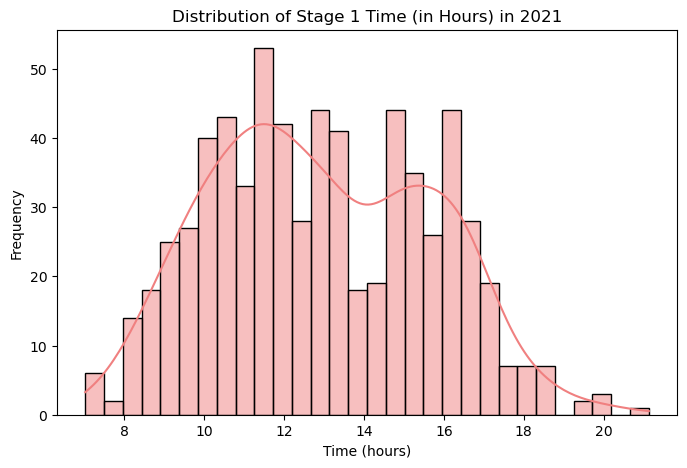

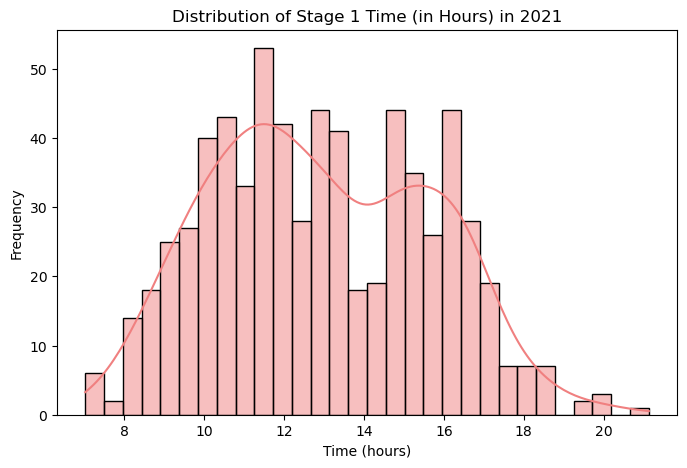

********************************************************************************
Processing column: Time Spent in Valgrisenche
count                          656
mean     0 days 01:21:31.487804878
std      0 days 00:59:25.712053104
min                0 days 00:01:21
25%         0 days 00:42:07.500000
50%                0 days 01:04:33
75%         0 days 01:45:42.500000
max                0 days 05:50:11
Name: Time Spent in Valgrisenche, dtype: object
********************************************************************************
Processing column: Time Spent in Valgrisenche
count                          656
mean     0 days 01:21:31.487804878
std      0 days 00:59:25.712053104
min                0 days 00:01:21
25%         0 days 00:42:07.500000
50%                0 days 01:04:33
75%         0 days 01:45:42.500000
max                0 days 05:50:11
Name: Time Spent in Valgrisenche, dtype: object


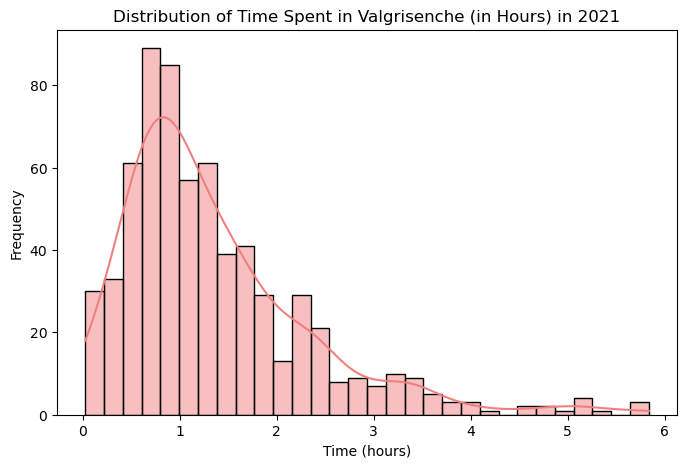

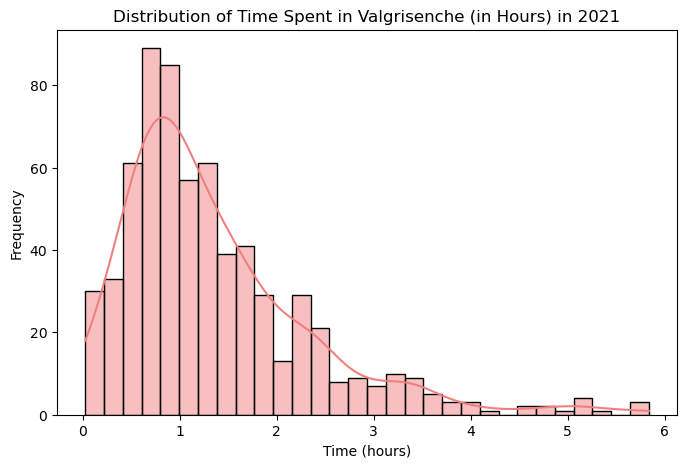

********************************************************************************
Processing column: Stage 2 Time
count                          586
mean     0 days 17:44:36.151877133
std      0 days 02:52:42.954738487
min                0 days 09:51:53
25%         0 days 15:45:38.250000
50%         0 days 17:47:02.500000
75%         0 days 19:38:53.500000
max                1 days 01:19:41
Name: Stage 2 Time, dtype: object
********************************************************************************
Processing column: Stage 2 Time
count                          586
mean     0 days 17:44:36.151877133
std      0 days 02:52:42.954738487
min                0 days 09:51:53
25%         0 days 15:45:38.250000
50%         0 days 17:47:02.500000
75%         0 days 19:38:53.500000
max                1 days 01:19:41
Name: Stage 2 Time, dtype: object


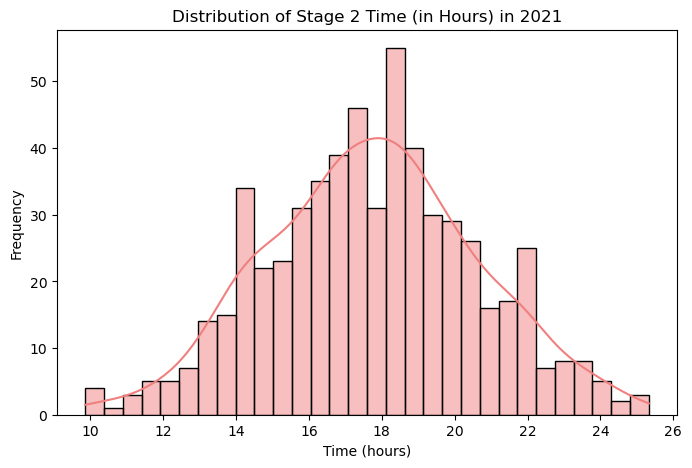

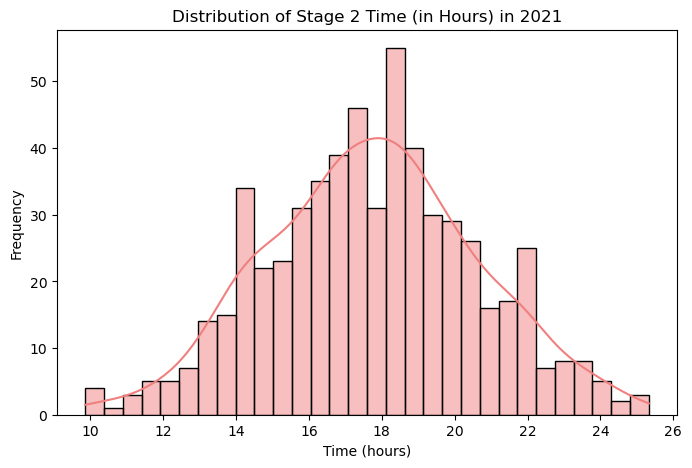

********************************************************************************
Processing column: Time Spent in Cogne
count                          574
mean     0 days 02:41:34.367595818
std      0 days 01:33:09.697141317
min                0 days 00:00:17
25%         0 days 01:26:49.250000
50%                0 days 02:35:42
75%         0 days 03:47:43.500000
max                0 days 10:00:27
Name: Time Spent in Cogne, dtype: object
********************************************************************************
Processing column: Time Spent in Cogne
count                          574
mean     0 days 02:41:34.367595818
std      0 days 01:33:09.697141317
min                0 days 00:00:17
25%         0 days 01:26:49.250000
50%                0 days 02:35:42
75%         0 days 03:47:43.500000
max                0 days 10:00:27
Name: Time Spent in Cogne, dtype: object


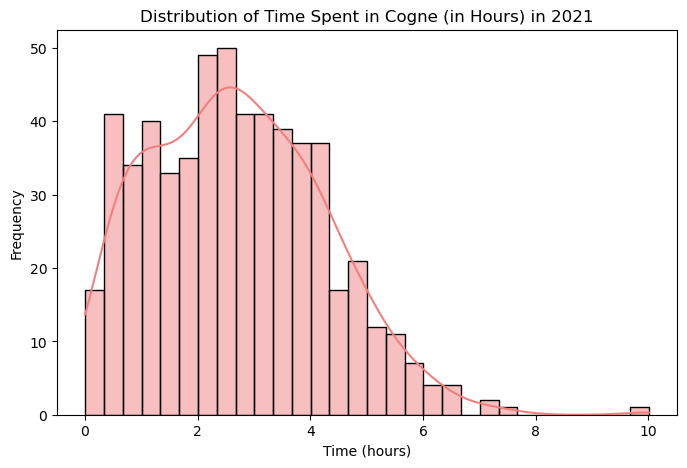

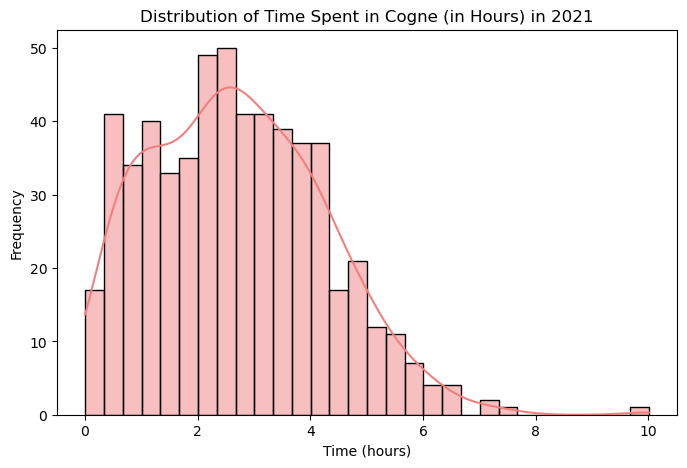

********************************************************************************
Processing column: Stage 3 Time
count                          544
mean     0 days 11:53:54.303308823
std      0 days 01:52:34.335719989
min                0 days 06:59:02
25%         0 days 10:38:08.750000
50%                0 days 11:58:48
75%                0 days 13:06:17
max                0 days 17:42:14
Name: Stage 3 Time, dtype: object
********************************************************************************
Processing column: Stage 3 Time
count                          544
mean     0 days 11:53:54.303308823
std      0 days 01:52:34.335719989
min                0 days 06:59:02
25%         0 days 10:38:08.750000
50%                0 days 11:58:48
75%                0 days 13:06:17
max                0 days 17:42:14
Name: Stage 3 Time, dtype: object


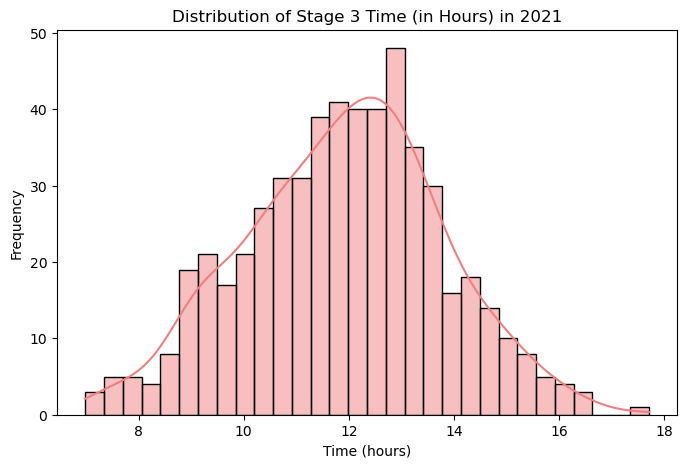

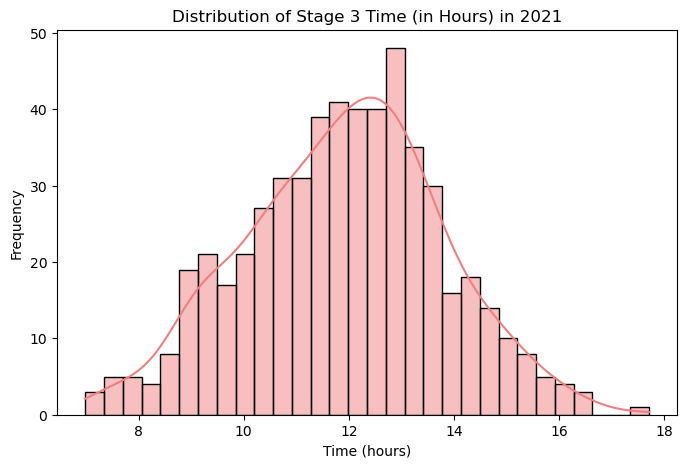

********************************************************************************
Processing column: Time Spent in Donnas
count                          550
mean     0 days 02:59:05.425454545
std      0 days 01:24:44.160058266
min                0 days 00:00:11
25%         0 days 01:58:56.750000
50%                0 days 03:00:06
75%         0 days 03:49:41.500000
max                0 days 07:53:42
Name: Time Spent in Donnas, dtype: object
********************************************************************************
Processing column: Time Spent in Donnas
count                          550
mean     0 days 02:59:05.425454545
std      0 days 01:24:44.160058266
min                0 days 00:00:11
25%         0 days 01:58:56.750000
50%                0 days 03:00:06
75%         0 days 03:49:41.500000
max                0 days 07:53:42
Name: Time Spent in Donnas, dtype: object


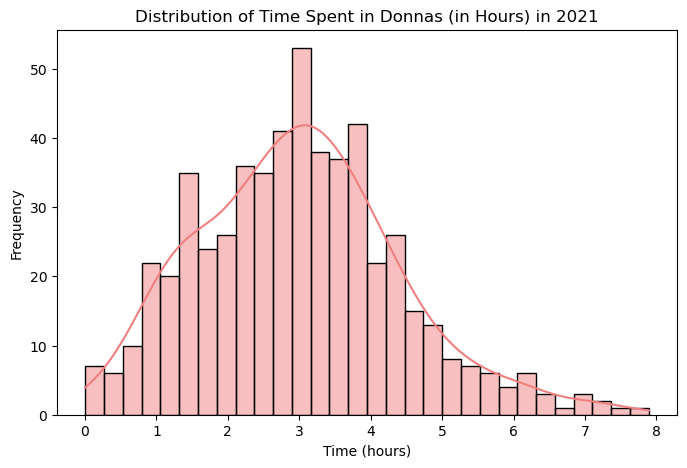

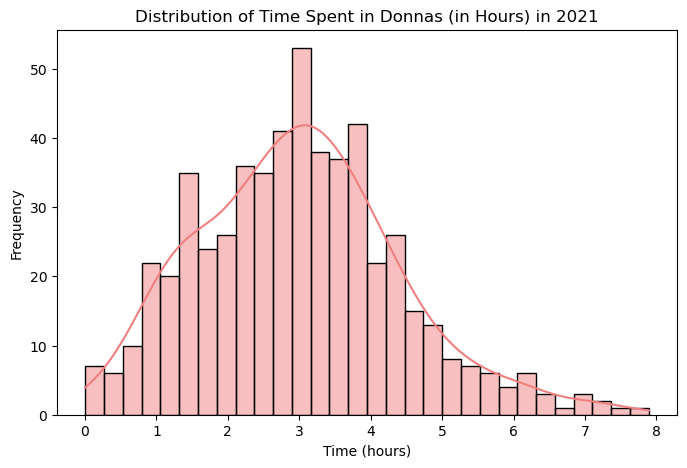

********************************************************************************
Processing column: Stage 4 Time
count                          492
mean     0 days 22:28:53.575203252
std      0 days 03:21:12.720670647
min                0 days 12:52:51
25%                0 days 19:52:32
50%         0 days 22:54:52.500000
75%         1 days 00:59:00.750000
max                1 days 07:57:28
Name: Stage 4 Time, dtype: object
********************************************************************************
Processing column: Stage 4 Time
count                          492
mean     0 days 22:28:53.575203252
std      0 days 03:21:12.720670647
min                0 days 12:52:51
25%                0 days 19:52:32
50%         0 days 22:54:52.500000
75%         1 days 00:59:00.750000
max                1 days 07:57:28
Name: Stage 4 Time, dtype: object


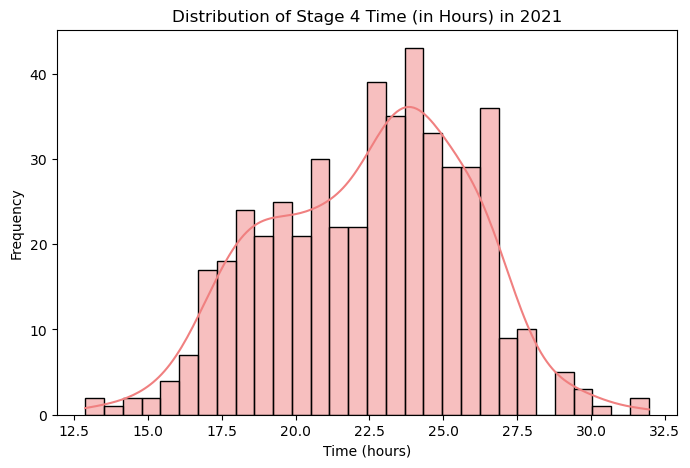

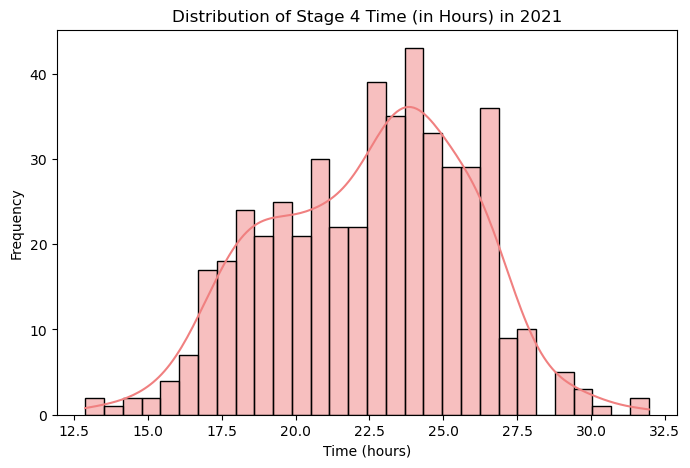

********************************************************************************
Processing column: Time Spent in Gressoney
count                          484
mean     0 days 03:15:04.756198347
std      0 days 01:33:45.365059832
min                0 days 00:00:16
25%                0 days 02:18:08
50%                0 days 03:17:50
75%         0 days 04:08:15.500000
max                0 days 13:37:22
Name: Time Spent in Gressoney, dtype: object
********************************************************************************
Processing column: Time Spent in Gressoney
count                          484
mean     0 days 03:15:04.756198347
std      0 days 01:33:45.365059832
min                0 days 00:00:16
25%                0 days 02:18:08
50%                0 days 03:17:50
75%         0 days 04:08:15.500000
max                0 days 13:37:22
Name: Time Spent in Gressoney, dtype: object


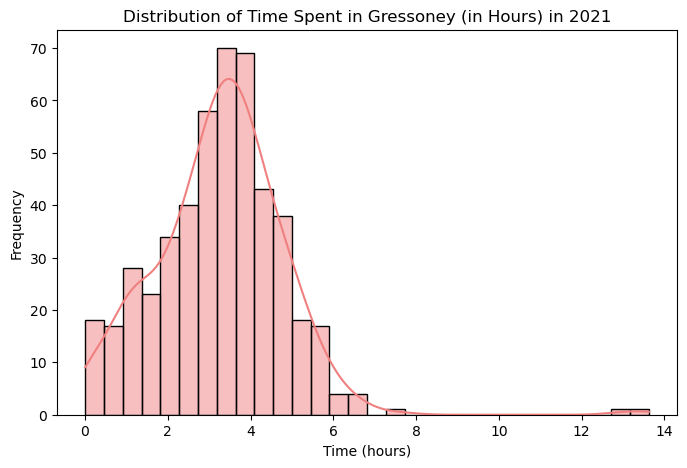

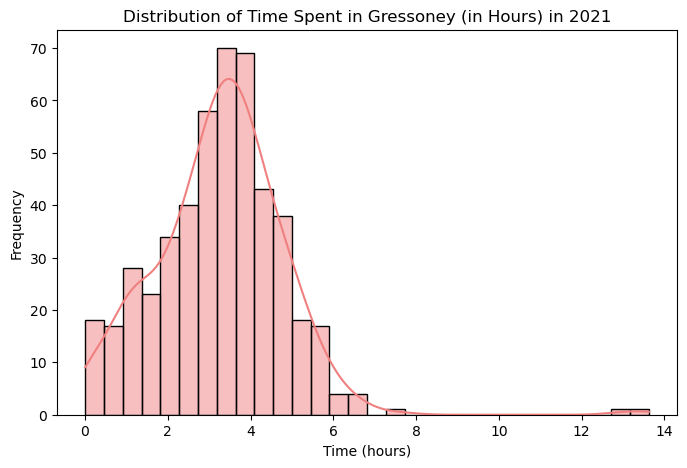

********************************************************************************
Processing column: Stage 5 Time
count                          456
mean     0 days 12:22:33.504385964
std      0 days 02:08:20.592781805
min                0 days 07:12:17
25%                0 days 10:51:29
50%                0 days 12:17:27
75%         0 days 13:43:14.750000
max                0 days 21:55:34
Name: Stage 5 Time, dtype: object
********************************************************************************
Processing column: Stage 5 Time
count                          456
mean     0 days 12:22:33.504385964
std      0 days 02:08:20.592781805
min                0 days 07:12:17
25%                0 days 10:51:29
50%                0 days 12:17:27
75%         0 days 13:43:14.750000
max                0 days 21:55:34
Name: Stage 5 Time, dtype: object


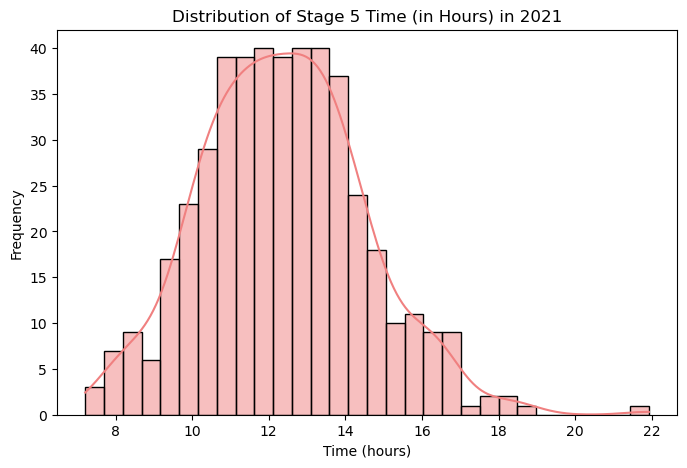

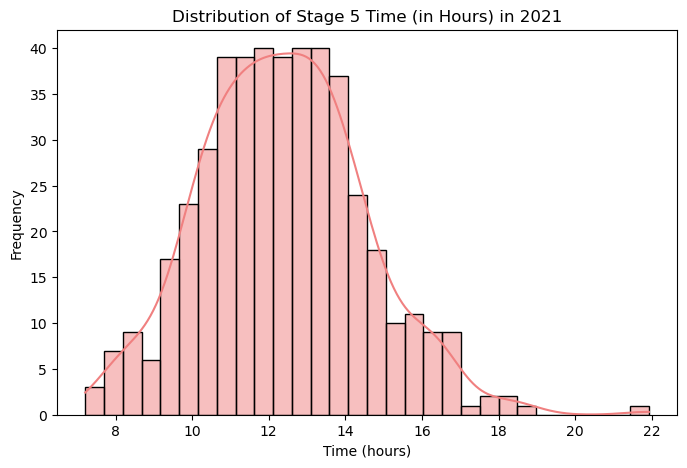

********************************************************************************
Processing column: Time Spent in Valtournenche
count                          458
mean     0 days 03:04:16.624454148
std      0 days 01:49:18.120441663
min                0 days 00:13:58
25%         0 days 01:44:18.250000
50%                0 days 02:59:45
75%         0 days 04:07:13.500000
max                0 days 15:24:00
Name: Time Spent in Valtournenche, dtype: object
********************************************************************************
Processing column: Time Spent in Valtournenche
count                          458
mean     0 days 03:04:16.624454148
std      0 days 01:49:18.120441663
min                0 days 00:13:58
25%         0 days 01:44:18.250000
50%                0 days 02:59:45
75%         0 days 04:07:13.500000
max                0 days 15:24:00
Name: Time Spent in Valtournenche, dtype: object


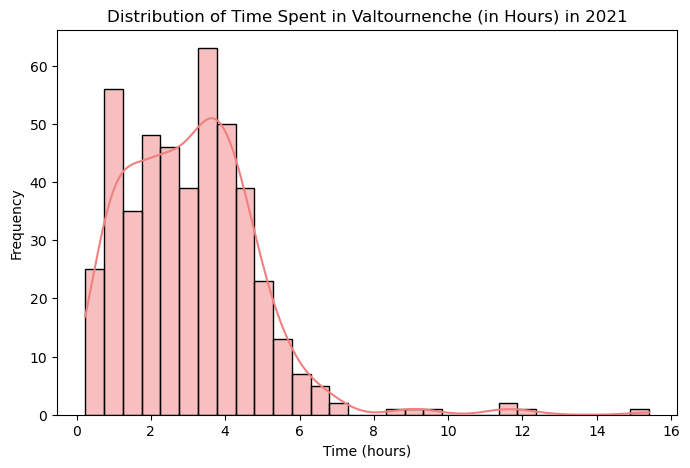

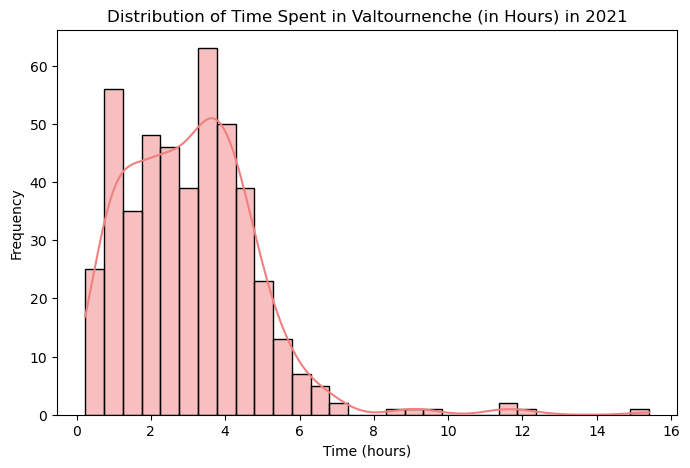

********************************************************************************
Processing column: Stage 6 Time
count                          433
mean     0 days 20:17:30.745958429
std      0 days 02:43:19.449533393
min                0 days 11:32:42
25%                0 days 18:40:06
50%                0 days 20:21:41
75%                0 days 22:07:08
max                1 days 04:30:19
Name: Stage 6 Time, dtype: object
********************************************************************************
Processing column: Stage 6 Time
count                          433
mean     0 days 20:17:30.745958429
std      0 days 02:43:19.449533393
min                0 days 11:32:42
25%                0 days 18:40:06
50%                0 days 20:21:41
75%                0 days 22:07:08
max                1 days 04:30:19
Name: Stage 6 Time, dtype: object


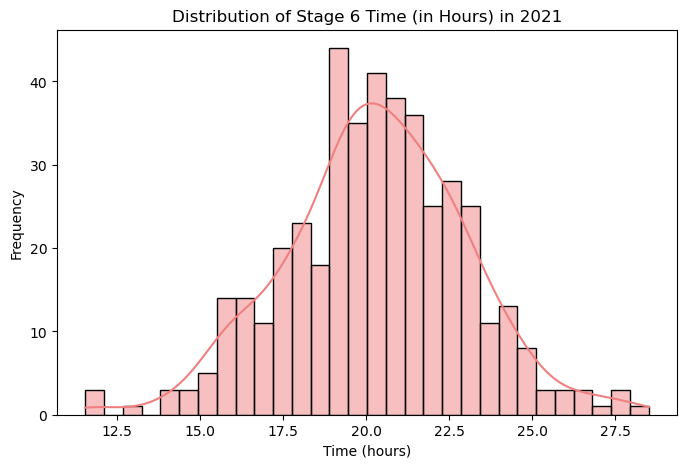

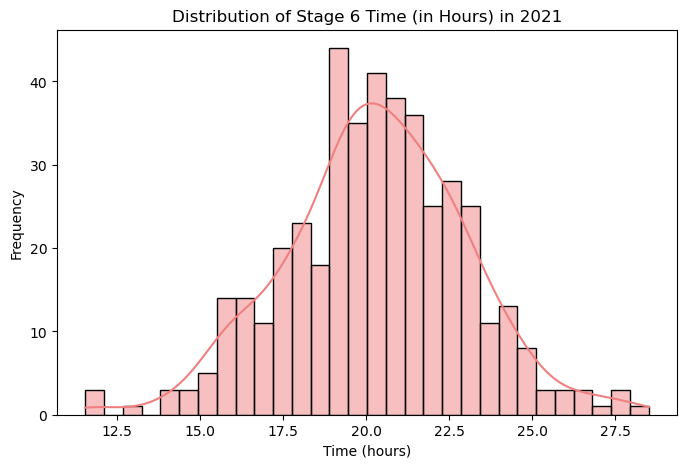

********************************************************************************
Processing column: Time Spent in Ollomont
count                          416
mean     0 days 02:27:21.834134615
std      0 days 01:18:35.315366053
min              -1 days +23:58:32
25%         0 days 01:31:26.500000
50%                0 days 02:17:06
75%         0 days 03:16:58.250000
max                0 days 07:24:40
Name: Time Spent in Ollomont, dtype: object
********************************************************************************
Processing column: Time Spent in Ollomont
count                          416
mean     0 days 02:27:21.834134615
std      0 days 01:18:35.315366053
min              -1 days +23:58:32
25%         0 days 01:31:26.500000
50%                0 days 02:17:06
75%         0 days 03:16:58.250000
max                0 days 07:24:40
Name: Time Spent in Ollomont, dtype: object


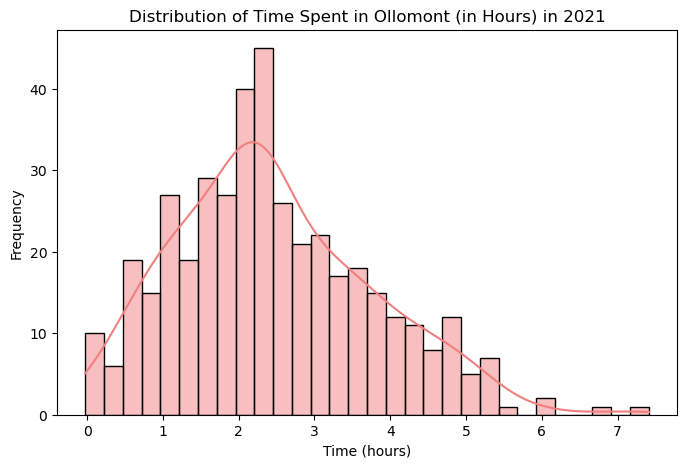

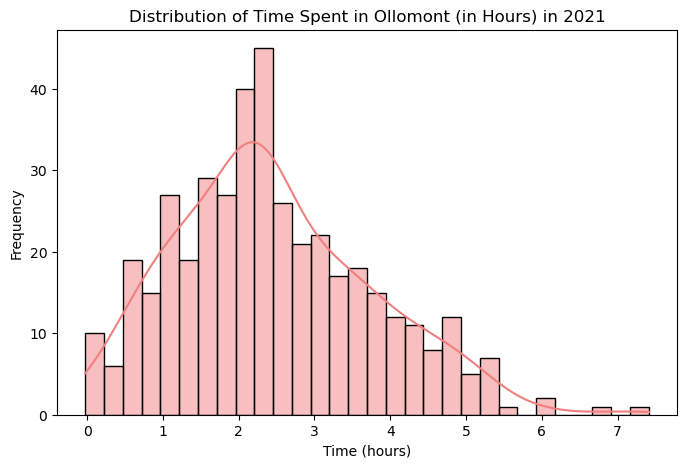

********************************************************************************
Processing column: Stage 7 Time
count                          413
mean     0 days 16:53:27.002421307
std      0 days 02:54:49.072059177
min                0 days 02:46:38
25%                0 days 14:47:19
50%                0 days 16:39:43
75%                0 days 19:11:07
max                1 days 03:23:55
Name: Stage 7 Time, dtype: object
********************************************************************************
Processing column: Stage 7 Time
count                          413
mean     0 days 16:53:27.002421307
std      0 days 02:54:49.072059177
min                0 days 02:46:38
25%                0 days 14:47:19
50%                0 days 16:39:43
75%                0 days 19:11:07
max                1 days 03:23:55
Name: Stage 7 Time, dtype: object


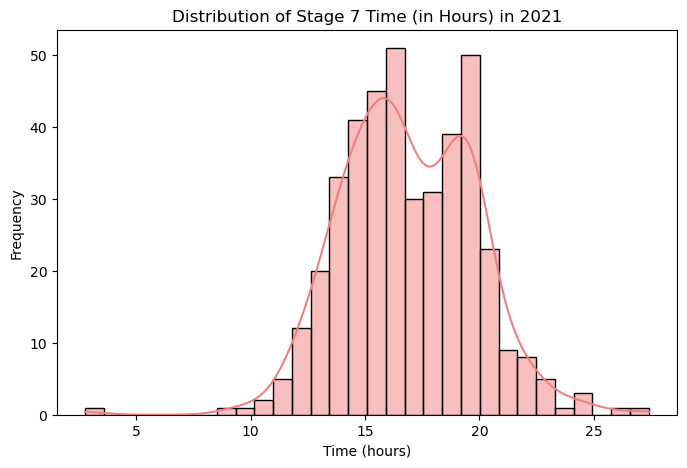

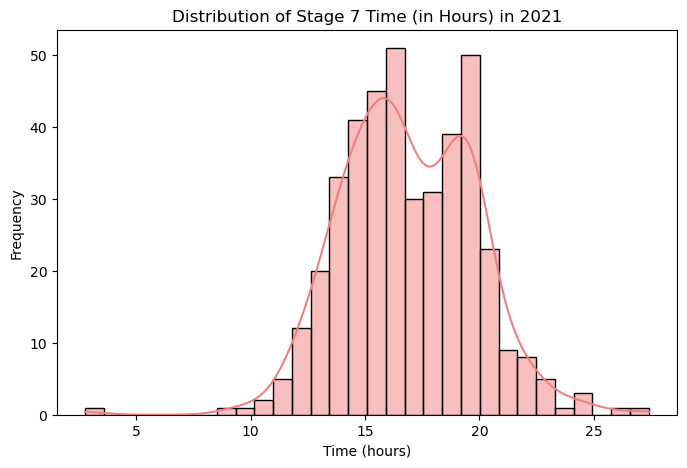

********************************************************************************
Processing column: Duration
count                          431
mean     5 days 08:41:51.742459396
std      0 days 16:40:58.908991872
min                2 days 18:43:57
25%         4 days 23:40:41.500000
50%                5 days 09:32:16
75%                5 days 23:06:38
max                6 days 09:05:28
Name: Duration, dtype: object
********************************************************************************
Processing column: Duration
count                          431
mean     5 days 08:41:51.742459396
std      0 days 16:40:58.908991872
min                2 days 18:43:57
25%         4 days 23:40:41.500000
50%                5 days 09:32:16
75%                5 days 23:06:38
max                6 days 09:05:28
Name: Duration, dtype: object


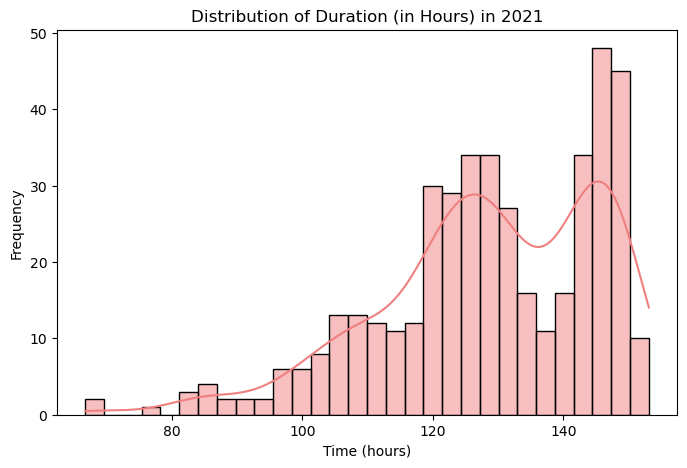

********************************************************************************


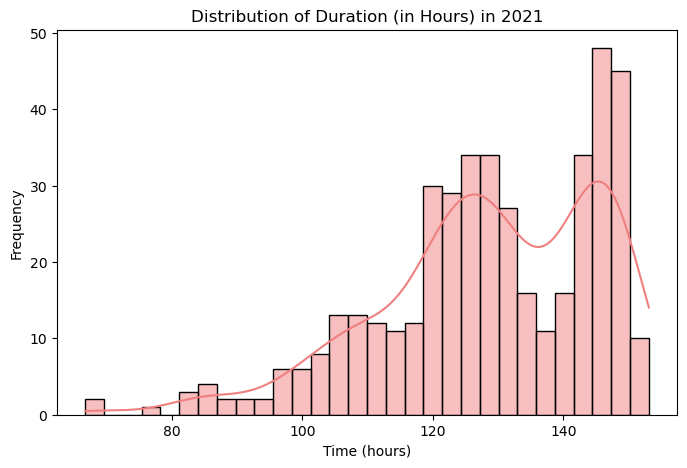

********************************************************************************


In [76]:
# Define the columns to process
time_columns = ['Stage 1 Time', 'Time Spent in Valgrisenche', 
                'Stage 2 Time', 'Time Spent in Cogne',
                'Stage 3 Time', 'Time Spent in Donnas',
                'Stage 4 Time', 'Time Spent in Gressoney',
                'Stage 5 Time', 'Time Spent in Valtournenche',
                'Stage 6 Time', 'Time Spent in Ollomont',
                'Stage 7 Time', 'Duration']

# Loop through the columns
for column in time_columns:
    print(f"Processing column: {column}")
    print(tableau_pivoted_TOR330_dates[column].describe())
    
    
    
    
    # Convert to timedelta and get total hours (handling NaT)
    tableau_pivoted_TOR330_dates[f'{column}_hours'] = pd.to_timedelta(
        tableau_pivoted_TOR330_dates[f'{column}'], errors='coerce'
    ).dt.total_seconds() / 3600  # Convert seconds to hours

    # Drop NaN values for histogram visualization
    data_to_plot = tableau_pivoted_TOR330_dates[f'{column}_hours'].dropna()

    # Plot the histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data_to_plot, kde=True, bins=30, color="lightcoral")
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f"Distribution of {column} (in Hours) in {year}")
    plt.xlabel("Time (hours)")
    plt.ylabel("Frequency")
    plt.show()
    
    print('*'*80)


### Sub-Finish Category

I labelled the Finisher's Sub-130 Finish times
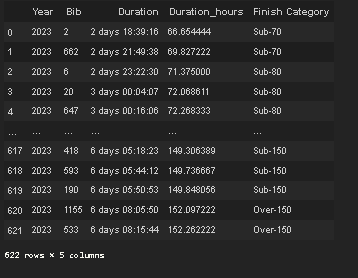

In [77]:
# Convert to timedelta and get total hours (handling NaT)
pivoted_TOR330_dates['Duration_hours'] = pd.to_timedelta(
    pivoted_TOR330_dates['Duration'], errors='coerce').dt.total_seconds() / 3600  # Convert seconds to hours
# Create a new column 'Finish Category'
def categorize_duration(hours):
    if pd.isna(hours):
        return 'DNF'  # Handle NaT values
    elif hours < 50:
        return 'Sub-50'
    elif hours <= 150:
        return f'Sub-{int(hours // 10) * 10 + 10}'  # Round to nearest 10 up to 150
    else:
        return 'Over-150'

pivoted_TOR330_dates['Finish Category'] = pivoted_TOR330_dates['Duration_hours'].apply(categorize_duration)


# Define the desired order of categories
category_order = [
    'Sub-50','Sub-60',
    'Sub-70','Sub-80','Sub-90', 'Sub-100', 'Sub-110', 'Sub-120',
    'Sub-130', 'Sub-140', 'Sub-150', 'Over-150', 'DNF'
]

# Set 'Finish Category' as a categorical column with the defined order
pivoted_TOR330_dates['Finish Category'] = pd.Categorical(
    pivoted_TOR330_dates['Finish Category'],
    categories=category_order,
    ordered=True
)


# Display the DataFrame
pivoted_TOR330_dates[['Year','Bib', 'Duration', 'Duration_hours', 'Finish Category']]

    

,Year,Bib,Duration,Duration_hours,Finish Category
0,2021,1,2 days 18:43:57,66.732500,Sub-70
366,2021,417,2 days 21:03:00,69.050000,Sub-70
1,2021,2,3 days 04:36:00,76.600000,Sub-80
9,2021,10,3 days 09:31:00,81.516667,Sub-90
4,2021,5,3 days 10:45:52,82.764444,Sub-90
...,...,...,...,...,...
703,2021,820,NaT,NaN,DNF
706,2021,823,NaT,NaN,DNF
708,2021,826,NaT,NaN,DNF
710,2021,828,NaT,NaN,DNF


,Year,Bib,Duration,Duration_hours,Finish Category
0,2021,1,2 days 18:43:57,66.732500,Sub-70
366,2021,417,2 days 21:03:00,69.050000,Sub-70
1,2021,2,3 days 04:36:00,76.600000,Sub-80
9,2021,10,3 days 09:31:00,81.516667,Sub-90
4,2021,5,3 days 10:45:52,82.764444,Sub-90
...,...,...,...,...,...
703,2021,820,NaT,NaN,DNF
706,2021,823,NaT,NaN,DNF
708,2021,826,NaT,NaN,DNF
710,2021,828,NaT,NaN,DNF


In [78]:
pivoted_TOR330_dates.groupby(['Finish Category'])['Finish Category'].count()

Finish Category
Sub-50        0
Sub-60        0
Sub-70        2
Sub-80        1
Sub-90       10
Sub-100      12
Sub-110      37
Sub-120      49
Sub-130     113
Sub-140      61
Sub-150     136
Over-150     10
DNF         281
Name: Finish Category, dtype: int64

Finish Category
Sub-50        0
Sub-60        0
Sub-70        2
Sub-80        1
Sub-90       10
Sub-100      12
Sub-110      37
Sub-120      49
Sub-130     113
Sub-140      61
Sub-150     136
Over-150     10
DNF         281
Name: Finish Category, dtype: int64

In [79]:

stages = [
    'Stage 1 Time', 'Time Spent in Valgrisenche',
    'Stage 2 Time', 'Time Spent in Cogne',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time'
]


# Group by 'Finish Category' and calculate the mean for specified columns
result = (
    pivoted_TOR330_dates.groupby(['Year', 'Finish Category'])[stages].mean()
    
).reset_index(drop = False)

# Add a 'Total' column with the sum of all time columns
# result['Total'] = result.sum(axis=1)
# # Convert to timedelta and get total hours (handling NaT)
# result['Total'] = pd.to_timedelta(
#     result['Total'], errors='coerce').dt.total_seconds() / 3600  # Convert seconds to hours
# # Create a new column 'Finish Category'

for column in stages:
    # Convert the column to timedelta and strip milliseconds
    result[f'{column}'] = pd.to_timedelta(result[f'{column}']).dt.floor('s')


result.sort_values(by='Finish Category', ascending=True)


# Display the final table
# result[(result['Finish Category'] == 'Sub-130') |
#       (result['Finish Category'] == 'Sub-150')]

,Year,Finish Category,Stage 1 Time,Time Spent in Valgrisenche,Stage 2 Time,Time Spent in Cogne,Stage 3 Time,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time
0,2021,Sub-50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2021,Sub-60,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2021,Sub-70,0 days 07:01:29,0 days 00:01:21,0 days 09:52:07,0 days 00:00:55,0 days 07:15:51,0 days 00:00:17,0 days 13:06:00,0 days 00:02:16,0 days 07:52:41,0 days 00:18:48,0 days 11:32:51,0 days 00:06:19,0 days 10:42:32
3,2021,Sub-80,0 days 07:27:05,0 days 00:01:39,0 days 11:15:39,0 days 00:00:36,0 days 07:42:23,0 days 00:00:16,0 days 14:46:57,0 days 01:11:49,0 days 07:12:17,0 days 00:17:28,0 days 13:01:15,0 days 00:59:48,0 days 12:38:48
4,2021,Sub-90,0 days 08:32:30,0 days 00:16:07,0 days 11:58:38,0 days 00:26:30,0 days 08:03:59,0 days 00:58:14,0 days 17:09:06,0 days 00:51:27,0 days 08:10:43,0 days 00:57:00,0 days 15:46:12,0 days 00:41:04,0 days 11:35:59
5,2021,Sub-100,0 days 09:04:33,0 days 00:36:22,0 days 13:35:44,0 days 00:54:00,0 days 08:45:31,0 days 01:51:58,0 days 17:23:04,0 days 01:23:20,0 days 09:45:25,0 days 01:53:58,0 days 16:06:33,0 days 01:15:10,0 days 14:15:11
6,2021,Sub-110,0 days 10:12:55,0 days 00:36:17,0 days 14:24:19,0 days 00:55:33,0 days 09:38:21,0 days 02:56:06,0 days 18:15:11,0 days 02:33:48,0 days 10:31:11,0 days 01:30:04,0 days 18:15:16,0 days 01:51:23,0 days 14:02:40
7,2021,Sub-120,0 days 10:50:35,0 days 00:45:42,0 days 15:45:46,0 days 01:41:21,0 days 10:41:13,0 days 02:57:42,0 days 19:27:43,0 days 03:15:07,0 days 11:15:42,0 days 02:05:06,0 days 19:45:15,0 days 01:42:47,0 days 15:25:07
8,2021,Sub-130,0 days 11:46:03,0 days 01:11:14,0 days 16:42:44,0 days 02:31:37,0 days 11:23:50,0 days 03:03:14,0 days 21:21:26,0 days 03:33:16,0 days 11:25:55,0 days 03:49:49,0 days 19:12:27,0 days 03:13:04,0 days 16:06:46
9,2021,Sub-140,0 days 12:36:14,0 days 01:24:57,0 days 17:51:14,0 days 03:03:12,0 days 12:30:49,0 days 02:47:25,0 days 23:39:35,0 days 03:20:05,0 days 13:21:50,0 days 03:03:40,0 days 21:02:13,0 days 02:51:48,0 days 16:59:30


,Year,Finish Category,Stage 1 Time,Time Spent in Valgrisenche,Stage 2 Time,Time Spent in Cogne,Stage 3 Time,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time
0,2021,Sub-50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2021,Sub-60,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2021,Sub-70,0 days 07:01:29,0 days 00:01:21,0 days 09:52:07,0 days 00:00:55,0 days 07:15:51,0 days 00:00:17,0 days 13:06:00,0 days 00:02:16,0 days 07:52:41,0 days 00:18:48,0 days 11:32:51,0 days 00:06:19,0 days 10:42:32
3,2021,Sub-80,0 days 07:27:05,0 days 00:01:39,0 days 11:15:39,0 days 00:00:36,0 days 07:42:23,0 days 00:00:16,0 days 14:46:57,0 days 01:11:49,0 days 07:12:17,0 days 00:17:28,0 days 13:01:15,0 days 00:59:48,0 days 12:38:48
4,2021,Sub-90,0 days 08:32:30,0 days 00:16:07,0 days 11:58:38,0 days 00:26:30,0 days 08:03:59,0 days 00:58:14,0 days 17:09:06,0 days 00:51:27,0 days 08:10:43,0 days 00:57:00,0 days 15:46:12,0 days 00:41:04,0 days 11:35:59
5,2021,Sub-100,0 days 09:04:33,0 days 00:36:22,0 days 13:35:44,0 days 00:54:00,0 days 08:45:31,0 days 01:51:58,0 days 17:23:04,0 days 01:23:20,0 days 09:45:25,0 days 01:53:58,0 days 16:06:33,0 days 01:15:10,0 days 14:15:11
6,2021,Sub-110,0 days 10:12:55,0 days 00:36:17,0 days 14:24:19,0 days 00:55:33,0 days 09:38:21,0 days 02:56:06,0 days 18:15:11,0 days 02:33:48,0 days 10:31:11,0 days 01:30:04,0 days 18:15:16,0 days 01:51:23,0 days 14:02:40
7,2021,Sub-120,0 days 10:50:35,0 days 00:45:42,0 days 15:45:46,0 days 01:41:21,0 days 10:41:13,0 days 02:57:42,0 days 19:27:43,0 days 03:15:07,0 days 11:15:42,0 days 02:05:06,0 days 19:45:15,0 days 01:42:47,0 days 15:25:07
8,2021,Sub-130,0 days 11:46:03,0 days 01:11:14,0 days 16:42:44,0 days 02:31:37,0 days 11:23:50,0 days 03:03:14,0 days 21:21:26,0 days 03:33:16,0 days 11:25:55,0 days 03:49:49,0 days 19:12:27,0 days 03:13:04,0 days 16:06:46
9,2021,Sub-140,0 days 12:36:14,0 days 01:24:57,0 days 17:51:14,0 days 03:03:12,0 days 12:30:49,0 days 02:47:25,0 days 23:39:35,0 days 03:20:05,0 days 13:21:50,0 days 03:03:40,0 days 21:02:13,0 days 02:51:48,0 days 16:59:30


In [80]:
pivoted_TOR330_dates[[
    'Name', 'Bib', # 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', 'Status1', 'Wave', 'Duration', 'Retired','Retired_Stage', 
    'Stage 1 Time', 'Time Spent in Valgrisenche', 
    'Stage 2 Time', 'Time Spent in Cogne',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time', 'Duration','Duration_hours', 'Finish Category'
]]

,Name,Bib,Stage 1 Time,Time Spent in Valgrisenche,Stage 2 Time,Time Spent in Cogne,Stage 3 Time,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time,Duration,Duration_hours,Finish Category
0,Colle Franco,1,0 days 07:01:28,0 days 00:01:21,0 days 09:52:21,0 days 00:00:44,0 days 07:32:41,0 days 00:00:11,0 days 12:52:51,0 days 00:00:16,0 days 07:50:53,0 days 00:18:56,0 days 11:32:42,0 days 00:00:13,0 days 09:39:20,2 days 18:43:57,66.732500,Sub-70
366,Jonas Russi,417,0 days 07:01:30,0 days 00:01:21,0 days 09:51:53,0 days 00:01:07,0 days 06:59:02,0 days 00:00:23,0 days 13:19:10,0 days 00:04:16,0 days 07:54:29,0 days 00:18:40,0 days 11:33:00,0 days 00:12:25,0 days 11:45:44,2 days 21:03:00,69.050000,Sub-70
1,Restorp Petter,2,0 days 07:27:05,0 days 00:01:39,0 days 11:15:39,0 days 00:00:36,0 days 07:42:23,0 days 00:00:16,0 days 14:46:57,0 days 01:11:49,0 days 07:12:17,0 days 00:17:28,0 days 13:01:15,0 days 00:59:48,0 days 12:38:48,3 days 04:36:00,76.600000,Sub-80
9,Picinali Luca,10,0 days 07:47:53,0 days 00:14:34,0 days 11:10:49,0 days 00:00:34,0 days 07:23:11,0 days 01:30:26,0 days 16:50:56,0 days 01:01:10,0 days 08:28:19,0 days 00:34:57,0 days 16:04:40,0 days 01:12:07,0 days 09:11:24,3 days 09:31:00,81.516667,Sub-90
4,Corsini Simone,5,0 days 08:08:21,0 days 00:01:29,0 days 13:02:55,0 days 00:23:01,0 days 07:24:10,0 days 00:33:04,0 days 17:11:27,0 days 00:21:22,0 days 07:21:54,0 days 00:56:23,0 days 15:38:09,0 days 01:16:22,0 days 10:27:15,3 days 10:45:52,82.764444,Sub-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Marziano Gianfranco,820,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,DNF
706,Patrick Delikat,823,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,DNF
708,Paul De Man,826,0 days 14:31:41,0 days 00:42:27,0 days 21:05:20,0 days 05:27:00,0 days 12:54:48,0 days 05:53:02,0 days 21:40:17,0 days 00:00:22,NaT,NaT,NaT,NaT,NaT,NaT,NaN,DNF
710,Grenti Filippo,828,0 days 17:36:57,0 days 03:32:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,DNF


,Name,Bib,Stage 1 Time,Time Spent in Valgrisenche,Stage 2 Time,Time Spent in Cogne,Stage 3 Time,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time,Duration,Duration_hours,Finish Category
0,Colle Franco,1,0 days 07:01:28,0 days 00:01:21,0 days 09:52:21,0 days 00:00:44,0 days 07:32:41,0 days 00:00:11,0 days 12:52:51,0 days 00:00:16,0 days 07:50:53,0 days 00:18:56,0 days 11:32:42,0 days 00:00:13,0 days 09:39:20,2 days 18:43:57,66.732500,Sub-70
366,Jonas Russi,417,0 days 07:01:30,0 days 00:01:21,0 days 09:51:53,0 days 00:01:07,0 days 06:59:02,0 days 00:00:23,0 days 13:19:10,0 days 00:04:16,0 days 07:54:29,0 days 00:18:40,0 days 11:33:00,0 days 00:12:25,0 days 11:45:44,2 days 21:03:00,69.050000,Sub-70
1,Restorp Petter,2,0 days 07:27:05,0 days 00:01:39,0 days 11:15:39,0 days 00:00:36,0 days 07:42:23,0 days 00:00:16,0 days 14:46:57,0 days 01:11:49,0 days 07:12:17,0 days 00:17:28,0 days 13:01:15,0 days 00:59:48,0 days 12:38:48,3 days 04:36:00,76.600000,Sub-80
9,Picinali Luca,10,0 days 07:47:53,0 days 00:14:34,0 days 11:10:49,0 days 00:00:34,0 days 07:23:11,0 days 01:30:26,0 days 16:50:56,0 days 01:01:10,0 days 08:28:19,0 days 00:34:57,0 days 16:04:40,0 days 01:12:07,0 days 09:11:24,3 days 09:31:00,81.516667,Sub-90
4,Corsini Simone,5,0 days 08:08:21,0 days 00:01:29,0 days 13:02:55,0 days 00:23:01,0 days 07:24:10,0 days 00:33:04,0 days 17:11:27,0 days 00:21:22,0 days 07:21:54,0 days 00:56:23,0 days 15:38:09,0 days 01:16:22,0 days 10:27:15,3 days 10:45:52,82.764444,Sub-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Marziano Gianfranco,820,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,DNF
706,Patrick Delikat,823,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,DNF
708,Paul De Man,826,0 days 14:31:41,0 days 00:42:27,0 days 21:05:20,0 days 05:27:00,0 days 12:54:48,0 days 05:53:02,0 days 21:40:17,0 days 00:00:22,NaT,NaT,NaT,NaT,NaT,NaT,NaN,DNF
710,Grenti Filippo,828,0 days 17:36:57,0 days 03:32:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,DNF


In [81]:
# Filter rows for 'Sub-130' finish category
sub_130_df = pivoted_TOR330_dates[pivoted_TOR330_dates['Finish Category'] == 'Sub-130']

# Group by 'Year' and 'Finish Category', then calculate descriptive statistics for the specified columns
result = (
    sub_130_df.groupby(['Year', 'Finish Category'])[stages]
    .describe()  # Get descriptive statistics
    .stack()  # Reshape for easier manipulation
    .unstack(0)  # Bring 'Year' to columns
    .reset_index()  # Flatten the index
)


# Ensure all time columns are converted to timedelta, strip milliseconds
for column in stages:
    sub_130_df[column] = pd.to_timedelta(sub_130_df[column], errors='coerce').dt.floor('s')

result



C:\Users\Karina\AppData\Local\Temp\ipykernel_18612\88173512.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_130_df[column] = pd.to_timedelta(sub_130_df[column], errors='coerce').dt.floor('s')


,Finish Category,level_1,Stage 1 Time,Time Spent in Valgrisenche,Stage 2 Time,Time Spent in Cogne,Stage 3 Time,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time
Year,,,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
0,Sub-130,count,112,111,111,110,111,112,112,111,111,112,111,110,111
1,Sub-130,mean,0 days 11:46:03.473214285,0 days 01:11:14.297297297,0 days 16:42:44.684684684,0 days 02:31:37.027272727,0 days 11:23:50.027027027,0 days 03:03:14.098214285,0 days 21:21:26.714285714,0 days 03:33:16.603603603,0 days 11:25:55.270270270,0 days 03:49:49.375000,0 days 19:12:27.450450450,0 days 03:13:04.245454545,0 days 16:06:46.378378378
2,Sub-130,std,0 days 01:27:38.184782458,0 days 00:50:24.024574799,0 days 01:17:24.709077849,0 days 01:10:29.076237777,0 days 01:09:01.482353105,0 days 01:20:18.347685015,0 days 01:55:19.502155487,0 days 01:19:13.863197020,0 days 01:29:28.898116078,0 days 02:05:40.624997545,0 days 01:53:21.247740790,0 days 01:20:54.020237095,0 days 02:02:19.308652175
3,Sub-130,min,0 days 09:15:28,0 days 00:02:11,0 days 12:48:29,0 days 00:30:07,0 days 08:58:40,0 days 00:31:15,0 days 16:40:01,0 days 00:42:01,0 days 08:26:12,0 days 00:50:51,0 days 14:57:07,0 days 00:29:52,0 days 12:18:10
4,Sub-130,25%,0 days 10:45:21,0 days 00:43:52,0 days 15:58:06.500000,0 days 01:44:49.250000,0 days 10:41:55,0 days 02:09:20.250000,0 days 19:55:18,0 days 02:40:32,0 days 10:40:31,0 days 02:33:21,0 days 17:55:27,0 days 02:11:27.500000,0 days 14:40:56.500000
5,Sub-130,50%,0 days 11:41:07.500000,0 days 00:57:07,0 days 16:48:23,0 days 02:27:40.500000,0 days 11:23:42,0 days 03:02:06,0 days 21:31:48,0 days 03:16:54,0 days 11:20:38,0 days 03:40:02,0 days 19:20:55,0 days 03:13:28.500000,0 days 15:57:49
6,Sub-130,75%,0 days 12:49:18.750000,0 days 01:29:50,0 days 17:24:23.500000,0 days 03:04:19.250000,0 days 11:55:53.500000,0 days 03:37:14.750000,0 days 22:47:38.750000,0 days 04:27:13.500000,0 days 11:56:47.500000,0 days 04:28:25.500000,0 days 20:33:58.500000,0 days 04:07:24.750000,0 days 17:05:04
7,Sub-130,max,0 days 15:19:08,0 days 05:50:11,0 days 20:41:12,0 days 07:00:27,0 days 14:42:26,0 days 07:13:08,1 days 01:10:11,0 days 06:42:15,0 days 21:55:34,0 days 12:09:30,1 days 00:23:27,0 days 07:24:40,1 days 00:09:49


C:\Users\Karina\AppData\Local\Temp\ipykernel_18612\88173512.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_130_df[column] = pd.to_timedelta(sub_130_df[column], errors='coerce').dt.floor('s')


,Finish Category,level_1,Stage 1 Time,Time Spent in Valgrisenche,Stage 2 Time,Time Spent in Cogne,Stage 3 Time,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time
Year,,,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
0,Sub-130,count,112,111,111,110,111,112,112,111,111,112,111,110,111
1,Sub-130,mean,0 days 11:46:03.473214285,0 days 01:11:14.297297297,0 days 16:42:44.684684684,0 days 02:31:37.027272727,0 days 11:23:50.027027027,0 days 03:03:14.098214285,0 days 21:21:26.714285714,0 days 03:33:16.603603603,0 days 11:25:55.270270270,0 days 03:49:49.375000,0 days 19:12:27.450450450,0 days 03:13:04.245454545,0 days 16:06:46.378378378
2,Sub-130,std,0 days 01:27:38.184782458,0 days 00:50:24.024574799,0 days 01:17:24.709077849,0 days 01:10:29.076237777,0 days 01:09:01.482353105,0 days 01:20:18.347685015,0 days 01:55:19.502155487,0 days 01:19:13.863197020,0 days 01:29:28.898116078,0 days 02:05:40.624997545,0 days 01:53:21.247740790,0 days 01:20:54.020237095,0 days 02:02:19.308652175
3,Sub-130,min,0 days 09:15:28,0 days 00:02:11,0 days 12:48:29,0 days 00:30:07,0 days 08:58:40,0 days 00:31:15,0 days 16:40:01,0 days 00:42:01,0 days 08:26:12,0 days 00:50:51,0 days 14:57:07,0 days 00:29:52,0 days 12:18:10
4,Sub-130,25%,0 days 10:45:21,0 days 00:43:52,0 days 15:58:06.500000,0 days 01:44:49.250000,0 days 10:41:55,0 days 02:09:20.250000,0 days 19:55:18,0 days 02:40:32,0 days 10:40:31,0 days 02:33:21,0 days 17:55:27,0 days 02:11:27.500000,0 days 14:40:56.500000
5,Sub-130,50%,0 days 11:41:07.500000,0 days 00:57:07,0 days 16:48:23,0 days 02:27:40.500000,0 days 11:23:42,0 days 03:02:06,0 days 21:31:48,0 days 03:16:54,0 days 11:20:38,0 days 03:40:02,0 days 19:20:55,0 days 03:13:28.500000,0 days 15:57:49
6,Sub-130,75%,0 days 12:49:18.750000,0 days 01:29:50,0 days 17:24:23.500000,0 days 03:04:19.250000,0 days 11:55:53.500000,0 days 03:37:14.750000,0 days 22:47:38.750000,0 days 04:27:13.500000,0 days 11:56:47.500000,0 days 04:28:25.500000,0 days 20:33:58.500000,0 days 04:07:24.750000,0 days 17:05:04
7,Sub-130,max,0 days 15:19:08,0 days 05:50:11,0 days 20:41:12,0 days 07:00:27,0 days 14:42:26,0 days 07:13:08,1 days 01:10:11,0 days 06:42:15,0 days 21:55:34,0 days 12:09:30,1 days 00:23:27,0 days 07:24:40,1 days 00:09:49


### Time Travel Issues
While playing with min/max/ mean for the time spent on each stage, I spotted a negative number for Stage 3 TIme.

This means that the individual was scanned 'Donnas IN' prior to 'Cogne OUT'
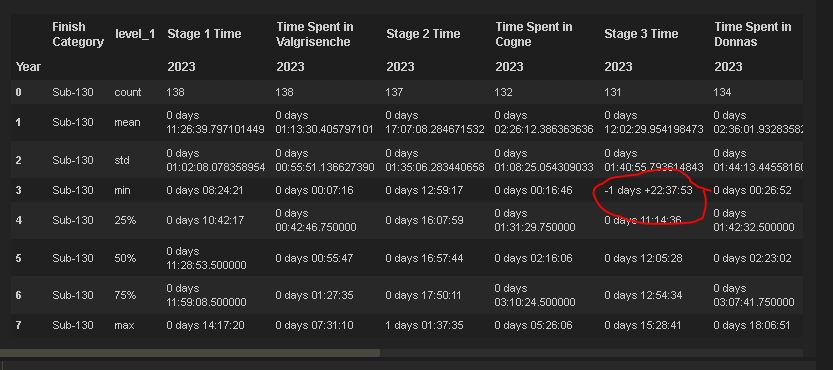

So I pulled the individual out to examine in more detail.

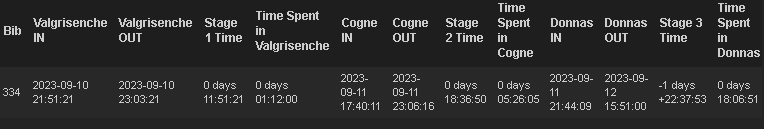

Looking at the raw data, it looks like it would make sense Bib# 334 to have been scanned 'DOnnas OUT' on the way in and 'Donnas IN' on the way out

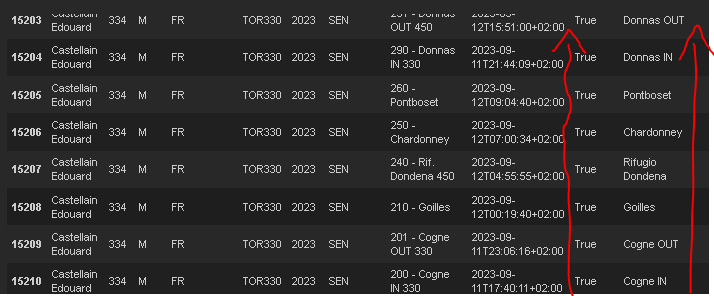

Code was written to detect more time travelling
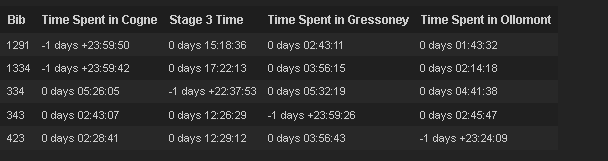


In [82]:
pivoted_TOR330_dates[[ 'Bib',  'Valgrisenche IN', 'Valgrisenche OUT', 'Stage 1 Time','Time Spent in Valgrisenche',  'Cogne IN', 'Cogne OUT', 'Stage 2 Time','Time Spent in Cogne', 'Donnas IN', 'Donnas OUT', 'Stage 3 Time', 'Time Spent in Donnas', 'Gressoney IN','Gressoney OUT', 'Stage 4 Time', 'Time Spent in Gressoney']][pivoted_TOR330_dates['Stage 3 Time'] == pd.to_timedelta('-1 days +22:37:53')]

,Bib,Valgrisenche IN,Valgrisenche OUT,Stage 1 Time,Time Spent in Valgrisenche,Cogne IN,Cogne OUT,Stage 2 Time,Time Spent in Cogne,Donnas IN,Donnas OUT,Stage 3 Time,Time Spent in Donnas,Gressoney IN,Gressoney OUT,Stage 4 Time,Time Spent in Gressoney


,Bib,Valgrisenche IN,Valgrisenche OUT,Stage 1 Time,Time Spent in Valgrisenche,Cogne IN,Cogne OUT,Stage 2 Time,Time Spent in Cogne,Donnas IN,Donnas OUT,Stage 3 Time,Time Spent in Donnas,Gressoney IN,Gressoney OUT,Stage 4 Time,Time Spent in Gressoney


In [83]:
bib334_places = ['Valgrisenche IN', 'Valgrisenche OUT'
                      'Cogne IN', 'Cogne OUT', 
                      'Donnas IN', 'Donnas OUT', 
                      'Gressoney IN','Gressoney OUT']

TOR330[(TOR330['Bib'] == 334) 
#       &(TOR330['aid_stations']).isin(bib334_places)
      ]

Name  Bib Sex Nationality    Race  Year  \
TOR330_2021 22356  Knowles English  334   F          US  TOR330  2021   
            22357  Knowles English  334   F          US  TOR330  2021   
            22358  Knowles English  334   F          US  TOR330  2021   
            22359  Knowles English  334   F          US  TOR330  2021   
            22360  Knowles English  334   F          US  TOR330  2021   
            22361  Knowles English  334   F          US  TOR330  2021   
            22362  Knowles English  334   F          US  TOR330  2021   
            22363  Knowles English  334   F          US  TOR330  2021   
            22364  Knowles English  334   F          US  TOR330  2021   
            22365  Knowles English  334   F          US  TOR330  2021   
            22366  Knowles English  334   F          US  TOR330  2021   
            22367  Knowles English  334   F          US  TOR330  2021   
            22368  Knowles English  334   F          US  TOR330  2021   
            22369  Knowles English  334   F          US  TOR330  2021   
            22370  Knowles English  334   F          US  TOR330  2021   
            22371  Knowles English  334   F          US  TOR330  2021   
            22372  Knowles English  334   F          US  TOR330  2021   
            22373  Knowles English  334   F          US  TOR330  2021   
            22374  Knowles English  334   F          US  TOR330  2021   
            22375  Knowles English  334   F          US  TOR330  2021   
            22376  Knowles English  334   F          US  TOR330  2021   
            22377  Knowles English  334   F          US  TOR330  2021   
            22378  Knowles English  334   F          US  TOR330  2021   
            22379  Knowles English  334   F          US  TOR330  2021   
            22380  Knowles English  334   F          US  TOR330  2021   
            22381  Knowles English  334   F          US  TOR330  2021   
            22382  Knowles English  334   F          US  TOR330  2021   
            22383  Knowles English  334   F          US  TOR330  2021   
            22384  Knowles English  334   F          US  TOR330  2021   
            22385  Knowles English  334   F          US  TOR330  2021   
            22386  Knowles English  334   F          US  TOR330  2021   
            22387  Knowles English  334   F          US  TOR330  2021   
            22388  Knowles English  334   F          US  TOR330  2021   
            22389  Knowles English  334   F          US  TOR330  2021   
            22390  Knowles English  334   F          US  TOR330  2021   
            22391  Knowles English  334   F          US  TOR330  2021   
            22392  Knowles English  334   F          US  TOR330  2021   
            22393  Knowles English  334   F          US  TOR330  2021   
            22394  Knowles English  334   F          US  TOR330  2021   
            22395  Knowles English  334   F          US  TOR330  2021   
            22396  Knowles English  334   F          US  TOR330  2021   
            22397  Knowles English  334   F          US  TOR330  2021   
            22398  Knowles English  334   F          US  TOR330  2021   
            22399  Knowles English  334   F          US  TOR330  2021   
            22400  Knowles English  334   F          US  TOR330  2021   
            22401  Knowles English  334   F          US  TOR330  2021   
            22402  Knowles English  334   F          US  TOR330  2021   
            22403  Knowles English  334   F          US  TOR330  2021   
            22404  Knowles English  334   F          US  TOR330  2021   
            22405  Knowles English  334   F          US  TOR330  2021   
            22406  Knowles English  334   F          US  TOR330  2021   
            22407  Knowles English  334   F          US  TOR330  2021   
            22408  Knowles English  334   F          US  TOR330  2021   

                  Category                                       Place  \
TOR330_2021 2

Name  Bib Sex Nationality    Race  Year  \
TOR330_2021 22356  Knowles English  334   F          US  TOR330  2021   
            22357  Knowles English  334   F          US  TOR330  2021   
            22358  Knowles English  334   F          US  TOR330  2021   
            22359  Knowles English  334   F          US  TOR330  2021   
            22360  Knowles English  334   F          US  TOR330  2021   
            22361  Knowles English  334   F          US  TOR330  2021   
            22362  Knowles English  334   F          US  TOR330  2021   
            22363  Knowles English  334   F          US  TOR330  2021   
            22364  Knowles English  334   F          US  TOR330  2021   
            22365  Knowles English  334   F          US  TOR330  2021   
            22366  Knowles English  334   F          US  TOR330  2021   
            22367  Knowles English  334   F          US  TOR330  2021   
            22368  Knowles English  334   F          US  TOR330  2021   
            22369  Knowles English  334   F          US  TOR330  2021   
            22370  Knowles English  334   F          US  TOR330  2021   
            22371  Knowles English  334   F          US  TOR330  2021   
            22372  Knowles English  334   F          US  TOR330  2021   
            22373  Knowles English  334   F          US  TOR330  2021   
            22374  Knowles English  334   F          US  TOR330  2021   
            22375  Knowles English  334   F          US  TOR330  2021   
            22376  Knowles English  334   F          US  TOR330  2021   
            22377  Knowles English  334   F          US  TOR330  2021   
            22378  Knowles English  334   F          US  TOR330  2021   
            22379  Knowles English  334   F          US  TOR330  2021   
            22380  Knowles English  334   F          US  TOR330  2021   
            22381  Knowles English  334   F          US  TOR330  2021   
            22382  Knowles English  334   F          US  TOR330  2021   
            22383  Knowles English  334   F          US  TOR330  2021   
            22384  Knowles English  334   F          US  TOR330  2021   
            22385  Knowles English  334   F          US  TOR330  2021   
            22386  Knowles English  334   F          US  TOR330  2021   
            22387  Knowles English  334   F          US  TOR330  2021   
            22388  Knowles English  334   F          US  TOR330  2021   
            22389  Knowles English  334   F          US  TOR330  2021   
            22390  Knowles English  334   F          US  TOR330  2021   
            22391  Knowles English  334   F          US  TOR330  2021   
            22392  Knowles English  334   F          US  TOR330  2021   
            22393  Knowles English  334   F          US  TOR330  2021   
            22394  Knowles English  334   F          US  TOR330  2021   
            22395  Knowles English  334   F          US  TOR330  2021   
            22396  Knowles English  334   F          US  TOR330  2021   
            22397  Knowles English  334   F          US  TOR330  2021   
            22398  Knowles English  334   F          US  TOR330  2021   
            22399  Knowles English  334   F          US  TOR330  2021   
            22400  Knowles English  334   F          US  TOR330  2021   
            22401  Knowles English  334   F          US  TOR330  2021   
            22402  Knowles English  334   F          US  TOR330  2021   
            22403  Knowles English  334   F          US  TOR330  2021   
            22404  Knowles English  334   F          US  TOR330  2021   
            22405  Knowles English  334   F          US  TOR330  2021   
            22406  Knowles English  334   F          US  TOR330  2021   
            22407  Knowles English  334   F          US  TOR330  2021   
            22408  Knowles English  334   F          US  TOR330  2021   

                  Category                                       Place  \
TOR330_2021 2

In [84]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Stage 3 Time'] == pd.to_timedelta('-1 days +22:37:53')]

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Status1,Wave,...,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time,Duration_hours,Finish Category


,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Status1,Wave,...,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time,Duration_hours,Finish Category


In [85]:
time_travel_issue = []

# Iterate through each stage
for stage in stages:
    # Find rows with negative time values in the current stage
    negative = pivoted_TOR330_dates[pivoted_TOR330_dates[stage] < pd.to_timedelta('00:00:00')]
    
    # Append the DataFrame with issues to the list if not empty
    if not negative.empty:
        time_travel_issue.append(negative)
        print('*'*20,'\n', pivoted_TOR330_dates[['Bib', stage]][pivoted_TOR330_dates[stage] < pd.to_timedelta('00:00:00')])

# Combine all detected issues into a single DataFrame
time_travel_issues_df = pd.concat(time_travel_issue).reset_index(drop=True)

# Save the result to a file (optional)
time_travel_issues_df.to_csv('time_travel_issues.csv', index=False)

# Display the resulting DataFrame
time_travel_issues_df


******************** 
      Bib Time Spent in Ollomont
144  162      -1 days +23:58:32
******************** 
      Bib Time Spent in Ollomont
144  162      -1 days +23:58:32


,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Status1,Wave,...,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time,Duration_hours,Finish Category
0,Valverde Andres,162,M,ES,2021,TOR330,V1,True,Finished,Wave1,...,0 days 03:52:44,0 days 20:55:10,0 days 04:52:21,0 days 11:16:11,0 days 06:15:29,0 days 19:10:40,-1 days +23:58:32,0 days 19:07:49,134.414167,Sub-140


,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Status1,Wave,...,Time Spent in Donnas,Stage 4 Time,Time Spent in Gressoney,Stage 5 Time,Time Spent in Valtournenche,Stage 6 Time,Time Spent in Ollomont,Stage 7 Time,Duration_hours,Finish Category
0,Valverde Andres,162,M,ES,2021,TOR330,V1,True,Finished,Wave1,...,0 days 03:52:44,0 days 20:55:10,0 days 04:52:21,0 days 11:16:11,0 days 06:15:29,0 days 19:10:40,-1 days +23:58:32,0 days 19:07:49,134.414167,Sub-140


In [86]:
time_travel_issues_df[['Bib', 'Duration',
                      'Time Spent in Cogne',
                      'Stage 3 Time',
                       'Time Spent in Gressoney',
                       'Time Spent in Ollomont',
                      ]]

,Bib,Duration,Time Spent in Cogne,Stage 3 Time,Time Spent in Gressoney,Time Spent in Ollomont
0,162,5 days 14:24:51,0 days 05:38:46,0 days 12:18:24,0 days 04:52:21,-1 days +23:58:32


,Bib,Duration,Time Spent in Cogne,Stage 3 Time,Time Spent in Gressoney,Time Spent in Ollomont
0,162,5 days 14:24:51,0 days 05:38:46,0 days 12:18:24,0 days 04:52:21,-1 days +23:58:32


In [87]:
time_travel_issues_df[['Bib', 'Duration',
                       'Valgrisenche IN','Valgrisenche OUT',
                       'Chalet Epee','Rhemes-Notre-Dame',  'Eaux Rousse', 'Stage 2 Time',
                       'Cogne IN','Cogne OUT',
                       'Goilles',
                       'Time Spent in Cogne',
                      'Stage 3 Time']][(time_travel_issues_df['Bib'] == 1291) |
                                      (time_travel_issues_df['Bib'] == 1334)]

,Bib,Duration,Valgrisenche IN,Valgrisenche OUT,Chalet Epee,Rhemes-Notre-Dame,Eaux Rousse,Stage 2 Time,Cogne IN,Cogne OUT,Goilles,Time Spent in Cogne,Stage 3 Time


,Bib,Duration,Valgrisenche IN,Valgrisenche OUT,Chalet Epee,Rhemes-Notre-Dame,Eaux Rousse,Stage 2 Time,Cogne IN,Cogne OUT,Goilles,Time Spent in Cogne,Stage 3 Time


In [88]:
time_travel_issues_df[['Bib', 'Duration',
                       'Valgrisenche IN', 'Valgrisenche OUT', 
                      'Cogne IN', 'Cogne OUT', 
                      'Donnas IN', 'Donnas OUT', 
                       'Stage 3 Time', 'Time Spent in Donnas', 'Perloz', 'Sassa', 
                      'Gressoney IN','Gressoney OUT', 
                      
                      ]][(time_travel_issues_df['Bib'] == 334)]

,Bib,Duration,Valgrisenche IN,Valgrisenche OUT,Cogne IN,Cogne OUT,Donnas IN,Donnas OUT,Stage 3 Time,Time Spent in Donnas,Perloz,Sassa,Gressoney IN,Gressoney OUT


,Bib,Duration,Valgrisenche IN,Valgrisenche OUT,Cogne IN,Cogne OUT,Donnas IN,Donnas OUT,Stage 3 Time,Time Spent in Donnas,Perloz,Sassa,Gressoney IN,Gressoney OUT


In [89]:
time_travel_issues_df[['Bib', 'Duration',
                       'Niel La Gruba',
                       'Gressoney IN','Gressoney OUT','Stage 4 Time',
                       'Time Spent in Gressoney',
                       'Rifugio Alpenzu', 
                       'Valtournenche IN', 'Stage 5 Time']][time_travel_issues_df['Bib'] == 343]

,Bib,Duration,Niel La Gruba,Gressoney IN,Gressoney OUT,Stage 4 Time,Time Spent in Gressoney,Rifugio Alpenzu,Valtournenche IN,Stage 5 Time


,Bib,Duration,Niel La Gruba,Gressoney IN,Gressoney OUT,Stage 4 Time,Time Spent in Gressoney,Rifugio Alpenzu,Valtournenche IN,Stage 5 Time


# Demographic data

In [90]:
TOR330_dem = pivoted_TOR330_dates.copy()

TOR330_dem['Duration_seconds'] = pd.to_timedelta(
    TOR330_dem['Duration'], errors='coerce'
).dt.total_seconds()

TOR330_dem = TOR330_dem[[ 'Year', 'Race', 'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Status1', 'Wave', 'Duration_seconds', 'Retired', 'Retired_Stage','Finish Category'  ]]

TOR330_dem.to_excel(f'{race} Data/5. Clean Data for Data Visualisation/{race}_{year}_dem.xlsx', index = False)

TOR330_dem

,Year,Race,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Status1,Wave,Duration_seconds,Retired,Retired_Stage,Finish Category
0,2021,TOR330,Colle Franco,1,M,IT,2021,TOR330,V1,True,Finished,Wave1,240237.0,NaN,NaN,Sub-70
366,2021,TOR330,Jonas Russi,417,M,CH,2021,TOR330,SEN,True,Finished,Wave1,248580.0,NaN,NaN,Sub-70
1,2021,TOR330,Restorp Petter,2,M,FR,2021,TOR330,V1,True,Finished,Wave1,275760.0,NaN,NaN,Sub-80
9,2021,TOR330,Picinali Luca,10,M,IT,2021,TOR330,V1,True,Finished,Wave1,293460.0,NaN,NaN,Sub-90
4,2021,TOR330,Corsini Simone,5,M,IT,2021,TOR330,SEN,True,Finished,Wave1,297952.0,NaN,NaN,Sub-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2021,TOR330,Marziano Gianfranco,820,M,IT,2021,TOR330,V1,False,DNF,Wave1,NaN,La Thuile,Stage 1,DNF
706,2021,TOR330,Patrick Delikat,823,M,FR,2021,TOR330,V2,False,DNF,Wave1,NaN,Planaval,Stage 1,DNF
708,2021,TOR330,Paul De Man,826,M,BE,2021,TOR330,V2,False,DNF,Wave1,NaN,Gressoney,Stage 4,DNF
710,2021,TOR330,Grenti Filippo,828,M,IT,2021,TOR330,V1,False,DNF,Wave1,NaN,Rhemes-Notre-Dame,Stage 2,DNF


,Year,Race,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Status1,Wave,Duration_seconds,Retired,Retired_Stage,Finish Category
0,2021,TOR330,Colle Franco,1,M,IT,2021,TOR330,V1,True,Finished,Wave1,240237.0,NaN,NaN,Sub-70
366,2021,TOR330,Jonas Russi,417,M,CH,2021,TOR330,SEN,True,Finished,Wave1,248580.0,NaN,NaN,Sub-70
1,2021,TOR330,Restorp Petter,2,M,FR,2021,TOR330,V1,True,Finished,Wave1,275760.0,NaN,NaN,Sub-80
9,2021,TOR330,Picinali Luca,10,M,IT,2021,TOR330,V1,True,Finished,Wave1,293460.0,NaN,NaN,Sub-90
4,2021,TOR330,Corsini Simone,5,M,IT,2021,TOR330,SEN,True,Finished,Wave1,297952.0,NaN,NaN,Sub-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2021,TOR330,Marziano Gianfranco,820,M,IT,2021,TOR330,V1,False,DNF,Wave1,NaN,La Thuile,Stage 1,DNF
706,2021,TOR330,Patrick Delikat,823,M,FR,2021,TOR330,V2,False,DNF,Wave1,NaN,Planaval,Stage 1,DNF
708,2021,TOR330,Paul De Man,826,M,BE,2021,TOR330,V2,False,DNF,Wave1,NaN,Gressoney,Stage 4,DNF
710,2021,TOR330,Grenti Filippo,828,M,IT,2021,TOR330,V1,False,DNF,Wave1,NaN,Rhemes-Notre-Dame,Stage 2,DNF


In [91]:

# import os

# # Specify the file path
# file_path = f'{race} Data/5. Clean Data for Data Visualisation/{race}_dem.xlsx'

# # Check if the file exists
# if os.path.exists(file_path):
#     # Read the existing file into a DataFrame
#     existing_data = pd.read_excel(file_path)

#     # Reset the index to ensure no duplicate indices
#     existing_data.reset_index(drop=True, inplace=True)
#     TOR330_dem.reset_index(drop=True, inplace=True)

#     # Find rows in TOR330_dem that are not in the existing_data
#     new_rows = TOR330_dem[~TOR330_dem.apply(tuple, axis=1).isin(existing_data.apply(tuple, axis=1))]

#     if not new_rows.empty:
#         # Concatenate the new rows to the existing data, resetting the index afterward
#         updated_data = pd.concat([existing_data, new_rows], ignore_index=True)

#         # Save the updated data back to the file
#         updated_data.to_excel(file_path, index=False)
#         print("New rows added to the file.")
#     else:
#         print("No new rows to add. File remains unchanged.")
# else:
#     # If the file doesn't exist, save the DataFrame as a new file
#     TOR330_dem.to_excel(file_path, index=False)
#     print(f"File created at {file_path}.")


In [93]:
TOR330_dem.groupby(['Status1'])['Status1'].count()

Status1
DNF         281
Finished    431
Name: Status1, dtype: int64

Status1
DNF         281
Finished    431
Name: Status1, dtype: int64

## Checkpoint Data

In [94]:
sub_lifebase_TOR330_dates = pivoted_TOR330_dates[[
    'Year', 'Race', 'Bib', 'Wave', 'Finish Category',
    'Valgrisenche IN', 'Valgrisenche OUT', 
    'Cogne IN', 'Cogne OUT',
    'Donnas IN', 'Donnas OUT',
    'Gressoney IN', 'Gressoney OUT',
    'Valtournenche IN', 'Valtournenche OUT', 
    'Ollomont IN', 'Ollomont OUT', 'FINISH'
]]
# Pivot the data using melt
melt_sub_lifebase_TOR330_dates = sub_lifebase_TOR330_dates.melt(id_vars=[ 
    'Year', "Race", "Bib", 'Wave', 'Finish Category'
                    ], 
                     var_name="Lifebase", 
                     value_name="Timestamp")



################### CATEGORY!
# Define the desired order of categories
category_order = [
#     'Sub-60',
    'Valgrisenche IN', 'Valgrisenche OUT', 
    'Cogne IN', 'Cogne OUT',
    'Donnas IN', 'Donnas OUT',
    'Gressoney IN', 'Gressoney OUT',
    'Valtournenche IN', 'Valtournenche OUT', 
    'Ollomont IN', 'Ollomont OUT', 'FINISH'
]

# Set 'Finish Category' as a categorical column with the defined order
melt_sub_lifebase_TOR330_dates['Lifebase'] = pd.Categorical(
    melt_sub_lifebase_TOR330_dates['Lifebase'],
    categories=category_order,
    ordered=True
)




melt_sub_lifebase_TOR330_dates[melt_sub_lifebase_TOR330_dates['Bib'] == 1440]

,Year,Race,Bib,Wave,Finish Category,Lifebase,Timestamp


,Year,Race,Bib,Wave,Finish Category,Lifebase,Timestamp


In [95]:
sub_stages_TOR330_dates = pivoted_TOR330_dates[[
    'Year', 'Race', 'Bib',  'Wave',  'Finish Category',
    'Stage 1 Time',
       'Time Spent in Valgrisenche', 'Stage 2 Time', 'Time Spent in Cogne',
       'Stage 3 Time', 'Time Spent in Donnas', 'Stage 4 Time',
       'Time Spent in Gressoney', 'Stage 5 Time',
       'Time Spent in Valtournenche', 'Stage 6 Time', 'Time Spent in Ollomont',
       'Stage 7 Time'
    
]]


# Pivot the data using melt
melt_sub_stages_TOR330_dates = sub_stages_TOR330_dates.melt(id_vars=[ 'Year', "Race", "Bib", 
                                                                      'Wave',  'Finish Category'
                                                                    ], 
                     var_name="Stage", 
                     value_name="Stage Duration")




################### CATEGORY!
# Define the desired order of categories
category_order = [
    'Stage 1 Time',
       'Time Spent in Valgrisenche', 'Stage 2 Time', 'Time Spent in Cogne',
       'Stage 3 Time', 'Time Spent in Donnas', 'Stage 4 Time',
       'Time Spent in Gressoney', 'Stage 5 Time',
       'Time Spent in Valtournenche', 'Stage 6 Time', 'Time Spent in Ollomont',
       'Stage 7 Time' 
]

# Set 'Finish Category' as a categorical column with the defined order
melt_sub_stages_TOR330_dates['Stage'] = pd.Categorical(
    melt_sub_stages_TOR330_dates['Stage'],
    categories=category_order,
    ordered=True
)

melt_sub_stages_TOR330_dates['Stage Duration_seconds'] = pd.to_timedelta(
    melt_sub_stages_TOR330_dates['Stage Duration'], errors='coerce'
).dt.total_seconds()

melt_sub_stages_TOR330_dates[melt_sub_stages_TOR330_dates['Bib'] == 1440]

,Year,Race,Bib,Wave,Finish Category,Stage,Stage Duration,Stage Duration_seconds


,Year,Race,Bib,Wave,Finish Category,Stage,Stage Duration,Stage Duration_seconds


In [96]:
melt_sub_lifebase_TOR330_dates

,Year,Race,Bib,Wave,Finish Category,Lifebase,Timestamp
0,2021,TOR330,1,Wave1,Sub-70,Valgrisenche IN,2021-09-12 17:01:28
1,2021,TOR330,417,Wave1,Sub-70,Valgrisenche IN,2021-09-12 17:01:30
2,2021,TOR330,2,Wave1,Sub-80,Valgrisenche IN,2021-09-12 17:27:05
3,2021,TOR330,10,Wave1,Sub-90,Valgrisenche IN,2021-09-12 17:47:53
4,2021,TOR330,5,Wave1,Sub-90,Valgrisenche IN,2021-09-12 18:08:21
...,...,...,...,...,...,...,...
9251,2021,TOR330,820,Wave1,DNF,FINISH,NaT
9252,2021,TOR330,823,Wave1,DNF,FINISH,NaT
9253,2021,TOR330,826,Wave1,DNF,FINISH,NaT
9254,2021,TOR330,828,Wave1,DNF,FINISH,NaT


,Year,Race,Bib,Wave,Finish Category,Lifebase,Timestamp
0,2021,TOR330,1,Wave1,Sub-70,Valgrisenche IN,2021-09-12 17:01:28
1,2021,TOR330,417,Wave1,Sub-70,Valgrisenche IN,2021-09-12 17:01:30
2,2021,TOR330,2,Wave1,Sub-80,Valgrisenche IN,2021-09-12 17:27:05
3,2021,TOR330,10,Wave1,Sub-90,Valgrisenche IN,2021-09-12 17:47:53
4,2021,TOR330,5,Wave1,Sub-90,Valgrisenche IN,2021-09-12 18:08:21
...,...,...,...,...,...,...,...
9251,2021,TOR330,820,Wave1,DNF,FINISH,NaT
9252,2021,TOR330,823,Wave1,DNF,FINISH,NaT
9253,2021,TOR330,826,Wave1,DNF,FINISH,NaT
9254,2021,TOR330,828,Wave1,DNF,FINISH,NaT


In [97]:
melt_sub_lifebase_TOR330_dates['Stage']  = melt_sub_lifebase_TOR330_dates['Lifebase'].copy()

melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Valgrisenche IN', 'Stage 1 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Cogne IN', 'Stage 2 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Donnas IN', 'Stage 3 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Gressoney IN', 'Stage 4 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Valtournenche IN', 'Stage 5 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Ollomont IN', 'Stage 6 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('FINISH', 'Stage 7 Time')



melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Valgrisenche OUT', 'Time Spent in Valgrisenche')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Cogne OUT', 'Time Spent in Cogne')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Donnas OUT', 'Time Spent in Donnas')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Gressoney OUT', 'Time Spent in Gressoney')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Valtournenche OUT', 'Time Spent in Valtournenche')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Ollomont OUT', 'Time Spent in Ollomont')

In [98]:
melt_sub_lifebase_TOR330_dates

,Year,Race,Bib,Wave,Finish Category,Lifebase,Timestamp,Stage
0,2021,TOR330,1,Wave1,Sub-70,Valgrisenche IN,2021-09-12 17:01:28,Stage 1 Time
1,2021,TOR330,417,Wave1,Sub-70,Valgrisenche IN,2021-09-12 17:01:30,Stage 1 Time
2,2021,TOR330,2,Wave1,Sub-80,Valgrisenche IN,2021-09-12 17:27:05,Stage 1 Time
3,2021,TOR330,10,Wave1,Sub-90,Valgrisenche IN,2021-09-12 17:47:53,Stage 1 Time
4,2021,TOR330,5,Wave1,Sub-90,Valgrisenche IN,2021-09-12 18:08:21,Stage 1 Time
...,...,...,...,...,...,...,...,...
9251,2021,TOR330,820,Wave1,DNF,FINISH,NaT,Stage 7 Time
9252,2021,TOR330,823,Wave1,DNF,FINISH,NaT,Stage 7 Time
9253,2021,TOR330,826,Wave1,DNF,FINISH,NaT,Stage 7 Time
9254,2021,TOR330,828,Wave1,DNF,FINISH,NaT,Stage 7 Time


,Year,Race,Bib,Wave,Finish Category,Lifebase,Timestamp,Stage
0,2021,TOR330,1,Wave1,Sub-70,Valgrisenche IN,2021-09-12 17:01:28,Stage 1 Time
1,2021,TOR330,417,Wave1,Sub-70,Valgrisenche IN,2021-09-12 17:01:30,Stage 1 Time
2,2021,TOR330,2,Wave1,Sub-80,Valgrisenche IN,2021-09-12 17:27:05,Stage 1 Time
3,2021,TOR330,10,Wave1,Sub-90,Valgrisenche IN,2021-09-12 17:47:53,Stage 1 Time
4,2021,TOR330,5,Wave1,Sub-90,Valgrisenche IN,2021-09-12 18:08:21,Stage 1 Time
...,...,...,...,...,...,...,...,...
9251,2021,TOR330,820,Wave1,DNF,FINISH,NaT,Stage 7 Time
9252,2021,TOR330,823,Wave1,DNF,FINISH,NaT,Stage 7 Time
9253,2021,TOR330,826,Wave1,DNF,FINISH,NaT,Stage 7 Time
9254,2021,TOR330,828,Wave1,DNF,FINISH,NaT,Stage 7 Time


In [99]:
TOR330_stages_melt =melt_sub_lifebase_TOR330_dates.merge(
    melt_sub_stages_TOR330_dates,  
    on = ['Year' , 'Race', 'Bib', 'Stage', 'Wave', 'Finish Category'],
    how='left'
)

TOR330_stages_melt = TOR330_stages_melt[[ 'Year', 'Race', 'Bib', 'Wave',  'Finish Category', 'Lifebase', 'Stage',
                                         'Timestamp', 'Stage Duration', 'Stage Duration_seconds']]

TOR330_stages_melt.to_excel(f'{race} Data/5. Clean Data for Data Visualisation/{race}_{year}_lifebase_timestamp.xlsx', index = False)
TOR330_stages_melt


,Year,Race,Bib,Wave,Finish Category,Lifebase,Stage,Timestamp,Stage Duration,Stage Duration_seconds
0,2021,TOR330,1,Wave1,Sub-70,Valgrisenche IN,Stage 1 Time,2021-09-12 17:01:28,0 days 07:01:28,25288.0
1,2021,TOR330,417,Wave1,Sub-70,Valgrisenche IN,Stage 1 Time,2021-09-12 17:01:30,0 days 07:01:30,25290.0
2,2021,TOR330,2,Wave1,Sub-80,Valgrisenche IN,Stage 1 Time,2021-09-12 17:27:05,0 days 07:27:05,26825.0
3,2021,TOR330,10,Wave1,Sub-90,Valgrisenche IN,Stage 1 Time,2021-09-12 17:47:53,0 days 07:47:53,28073.0
4,2021,TOR330,5,Wave1,Sub-90,Valgrisenche IN,Stage 1 Time,2021-09-12 18:08:21,0 days 08:08:21,29301.0
...,...,...,...,...,...,...,...,...,...,...
9251,2021,TOR330,820,Wave1,DNF,FINISH,Stage 7 Time,NaT,NaT,NaN
9252,2021,TOR330,823,Wave1,DNF,FINISH,Stage 7 Time,NaT,NaT,NaN
9253,2021,TOR330,826,Wave1,DNF,FINISH,Stage 7 Time,NaT,NaT,NaN
9254,2021,TOR330,828,Wave1,DNF,FINISH,Stage 7 Time,NaT,NaT,NaN


,Year,Race,Bib,Wave,Finish Category,Lifebase,Stage,Timestamp,Stage Duration,Stage Duration_seconds
0,2021,TOR330,1,Wave1,Sub-70,Valgrisenche IN,Stage 1 Time,2021-09-12 17:01:28,0 days 07:01:28,25288.0
1,2021,TOR330,417,Wave1,Sub-70,Valgrisenche IN,Stage 1 Time,2021-09-12 17:01:30,0 days 07:01:30,25290.0
2,2021,TOR330,2,Wave1,Sub-80,Valgrisenche IN,Stage 1 Time,2021-09-12 17:27:05,0 days 07:27:05,26825.0
3,2021,TOR330,10,Wave1,Sub-90,Valgrisenche IN,Stage 1 Time,2021-09-12 17:47:53,0 days 07:47:53,28073.0
4,2021,TOR330,5,Wave1,Sub-90,Valgrisenche IN,Stage 1 Time,2021-09-12 18:08:21,0 days 08:08:21,29301.0
...,...,...,...,...,...,...,...,...,...,...
9251,2021,TOR330,820,Wave1,DNF,FINISH,Stage 7 Time,NaT,NaT,NaN
9252,2021,TOR330,823,Wave1,DNF,FINISH,Stage 7 Time,NaT,NaT,NaN
9253,2021,TOR330,826,Wave1,DNF,FINISH,Stage 7 Time,NaT,NaT,NaN
9254,2021,TOR330,828,Wave1,DNF,FINISH,Stage 7 Time,NaT,NaT,NaN


### Checkpoints

In [ ]:
checkpoints_TOR330_df = pivoted_TOR330_dates[[
     'Year', 'Race', 'Bib', 'Wave', 'Retired', 'Retired_Stage', 'new_Start Date',
       'La Thuile', 'Valgrisenche IN', 'Valgrisenche OUT',
       'Eaux Rousse', 'Cogne IN', 'Cogne OUT', 'Donnas IN', 'Donnas OUT',
       'Rifugio della Barma', 'Niel La Gruba', 'Gressoney IN',
       'Gressoney OUT', 'Champoluc', 'Valtournenche IN',
       'Valtournenche OUT', 'Oyace', 'Ollomont IN', 'Ollomont OUT',
       'FINISH'
    
]]

In [ ]:
melt_checkpoints_TOR330_df = checkpoints_TOR330_df.melt(id_vars=[ 'Year','Race',	'Bib', 	
                                   'Wave',	'Retired',
                                   'Retired_Stage'], 
                     var_name="Checkpoint", 
                     value_name="Timestamp")
melt_checkpoints_TOR330_df

In [ ]:


################### CATEGORY!
# Define the desired order of categories
category_order = [ 'new_Start Date',
       'La Thuile', 'Valgrisenche IN', 'Valgrisenche OUT',
       'Eaux Rousse', 'Cogne IN', 'Cogne OUT', 'Donnas IN', 'Donnas OUT',
       'Rifugio della Barma', 'Niel La Gruba', 'Gressoney IN',
       'Gressoney OUT', 'Champoluc', 'Valtournenche IN',
       'Valtournenche OUT', 'Oyace', 'Ollomont IN', 'Ollomont OUT',
       'FINISH'
]

# Set 'Finish Category' as a categorical column with the defined order
melt_checkpoints_TOR330_df['Checkpoint'] = pd.Categorical(
    melt_checkpoints_TOR330_df['Checkpoint'],
    categories=category_order,
    ordered=True
)

## Who missed the Checkpoint Cut OFFs?

## Cutoffs
The cutoffs table was used to establish whether individuals missed the cutoffs or not.


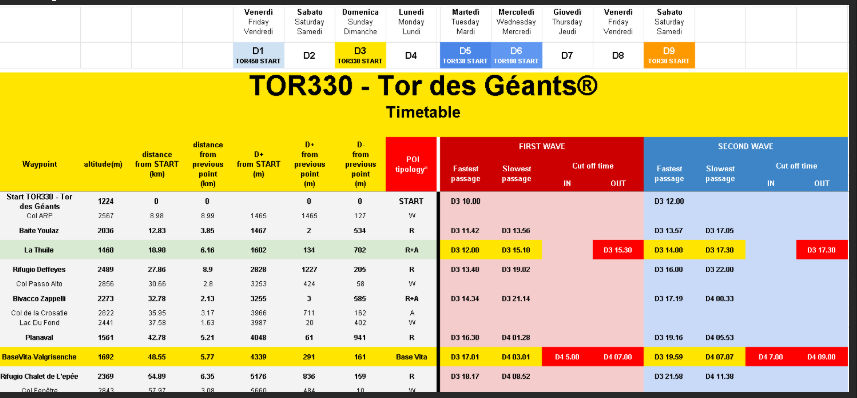


#### Stage Cutoffs
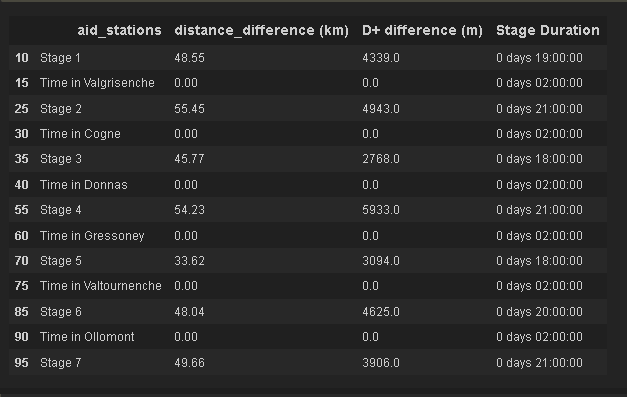

After cleaning the CSV and attaching dates instead of D1/ D2/ D3 etc, this is what the cut off talbe looks like:

#### Dates Cutoffs
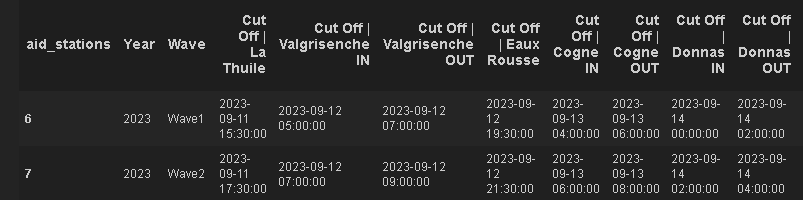

In [ ]:
stages_cut_offs_df = pd.read_excel(f'{race} Data/4. TOR330 Timetable Data/{race}_stages_cut_offs_df.xlsx')
stages_cut_offs_df['stage']  = stages_cut_offs_df['stage'] + ' Time'
stages_cut_offs_df

In [ ]:
cutoffs_df_pivot = pd.read_excel(f'{race} Data/4. TOR330 Timetable Data/{race}_aid_station_for_each_year_cut_offs_df.xlsx')
cutoffs_df_pivot['Year'] = cutoffs_df_pivot['Year'].astype('str')
cutoffs_df_pivot = cutoffs_df_pivot[cutoffs_df_pivot['Year'] == f'{year}']
cutoffs_df_pivot


### Did anyone who finished the race missed the cut off?

In [ ]:
# bib1440 = melt_checkpoints_TOR33_df[melt_checkpoints_TOR33_df['Bib'] == 1440]
# fifty = melt_checkpoints_TOR33_df
# for aid_station in cutoffs_df_melt['aid_stations'].unique():
    
#     for wave in ['Wave1', 'Wave2']:
#         cut_off_for_checkpoint = cutoffs_df_melt['Date'][(cutoffs_df_melt['aid_stations'] == aid_station) &
#                                                          (cutoffs_df_melt['Wave'] == wave) &
#                                                          (cutoffs_df_melt['Year'] == year)].values[0]
        
        
#         df = fifty[(fifty['Checkpoint'] == aid_station) &
#               (fifty['Wave'] == wave) &
#               (fifty['Year'] == year)]
        
# #         print(df ['Timestamp'])
#         print('\n', '*'*20 ,'\n', aid_station, wave, df.shape )
#             # Iterate over rows under the condition
#         for idx, row in df.iterrows():
#             # iterrate over the rows of 
#             if 'IN' in aid_station or ' OUT' in aid_station:
#                 new_aid_station = aid_station.split('')
#                 print(new_aid_station)
#                 df['Missed'] = np.where( cut_off_for_checkpoint - df [''] < pd.to_timedelta('00:00:00'),
#                                              f'Missed cutoff at {aid_station}' ,
#                                              np.nan)           
#             else:
#                 row['Missed'] = np.where( cut_off_for_checkpoint - row['Timestamp'] < pd.to_timedelta('00:00:00'),
#                                              f'Missed cutoff at {aid_station}' ,
#                                              np.nan)
#         print(df.groupby(['Missed'])['Missed'].count())
        
# # fifty ['Missed'].unique()

### Looking for the Polish Fella!

When I ran TOR 2023, I distingly remember running into a Polish fella as I was leaving Gressoney. I was hiking with him from Rifugio Barma, he was in Wave 1. I remember running up to him at the lifebase, all excited "Hey, you made it!"

The reply I recieved was "WHat are you talking about? I missed the cutoff"

So I began looking for him to find out why I dont have more people who missed the cut off!

Here I am leaving Gressoney!

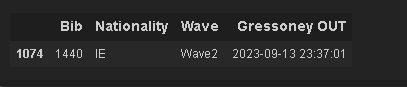

This is the cut off times
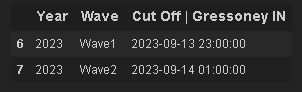

I looked for all the Poles that DNFed the race

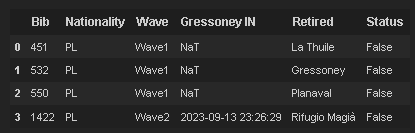

It is clear that he DNFed at 'Gressoney OUT - RITIRIO' 
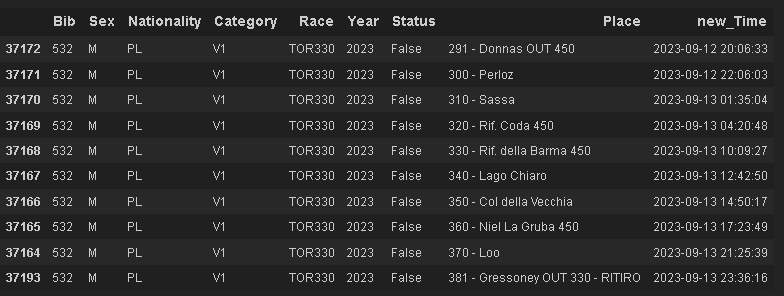
This is what is causing my heartache!


In [ ]:
pivoted_TOR330_dates[['Bib','Nationality','Wave', 'Gressoney IN','Retired', 'Status']][
    (pivoted_TOR330_dates['Nationality'] == 'PL') &
    (pivoted_TOR330_dates_DNF['Status'] == False)].reset_index(drop = True)   

In [ ]:
pivoted_TOR330_dates[[ 'Bib', 'Nationality','Wave', 'Gressoney OUT', 'Status']][
    pivoted_TOR330_dates['Bib'] == 1440]

In [ ]:
# Pivot the data so that each participant has its own column
polish532 =  TOR330[['Bib', 'Race','Year', 'Status' , 'Place', 'new_Time'
          ]][TOR330['Bib'] == 532].reset_index(drop = True)


polish532.sort_values(by= 'new_Time', ascending = True)[-10:]

#### RITIRIO

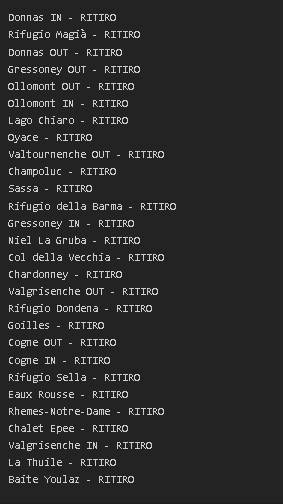



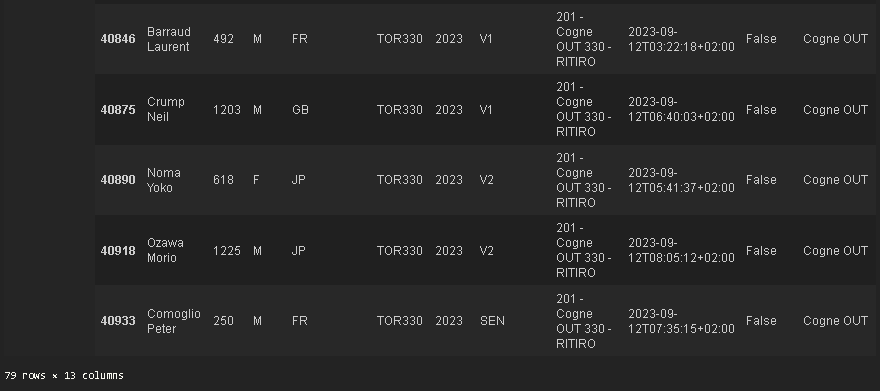

In [ ]:
# Pattern to match "OUT Number - RITIRO"
pattern = r'OUT \d+ - RITIRO'

TOR330[TOR330['Place'].str.contains(pattern, na=False)].reset_index(drop = True)

In [ ]:
for i in TOR330['RITIRIO'].unique():
    print(i)

In [ ]:
TORX_list = []
n=0
for unique_bib in melt_checkpoints_TOR330_df['Bib'].unique():

    # Filter the dataframe for the current unique_bib
    bib_df = melt_checkpoints_TOR330_df[melt_checkpoints_TOR330_df['Bib'] == unique_bib]
#     print(unique_bib, bib_df['Retired'].values[0])
    if bib_df['Retired'].isna().all():

        # Merge with the cutoffs dataframe
        bib_df = bib_df.merge(
            cutoffs_df_pivot,
            on=['Checkpoint', 'Wave', 'Year'],
            how='left')
    
        n = n+1
        print(n)
    

        # Iterate over the rows to process the data
        for idx, row in bib_df.iterrows():
            # Check if 'Timestamp' is missing
            if pd.isna(row['Timestamp']):
                bib_df.at[idx, 'Missed'] = 'No Timestamp'
    #             print(f"Missing timestamp for Checkpoint: {row['Checkpoint']}")
            else:
    #             print(f"Checkpoint: {row['Checkpoint']}")
                # Compute the duration (example assumes 'Timestamp' is datetime)
                if idx > 0:  # To avoid accessing out of bounds
                    bib_df.at[idx, 'Duration'] = row['Timestamp'] - bib_df.at[idx - 1, 'Timestamp']
                # Compare 'Timestamp' with the cutoff
                bib_df.at[idx, 'Missed'] = row['Timestamp'] > row['Cut Off Date']
                bib_df.at[idx, 'Missed Diff'] = np.where(row['Timestamp'] > row['Cut Off Date'],
                                                        row['Timestamp'] - row['Cut Off Date'],
                                                        np.nan)

        # Print the final processed dataframe for the current 'Bib'
    #     print(bib_df)
        TORX_list.append(bib_df)
    
    # Dealing with DNFs
    else:
         pass


In [ ]:
# Combine all processed dataframes into one
TORX_df = pd.concat(TORX_list, ignore_index=True)

# Print the final combined dataframe
print(TORX_df)

In [ ]:
TORX_df[
    # everyone who finished
    (TORX_df['Retired'].isna()) &
    # missed the cut off but finished
    (TORX_df['Missed'] == True)]

In [ ]:
TORX_list = []
n = 0

# Filter unique Bibs where 'Retired' is not NaN
for unique_bib in list(melt_checkpoints_TOR330_df['Bib'][~melt_checkpoints_TOR330_df['Retired'].isna()].unique())[:10]:
    # Filter the dataframe for the current unique_bib
    bib_df = melt_checkpoints_TOR330_df[melt_checkpoints_TOR330_df['Bib'] == unique_bib]

############################################################
    # Group by 'Bib' and find the last valid timestamp index
    last_valid_indices = bib_df[bib_df['Timestamp'].notna()].groupby('Bib').tail(1).index

    # Create a mask to filter out rows after the last valid timestamp for each 'Bib'
    mask = pd.Series(True, index=bib_df.index)
    for idx in last_valid_indices:
        bib = bib_df.at[idx, 'Bib']
        mask &= ~((bib_df['Bib'] == bib) & (bib_df.index > idx) & df['Timestamp'].isna())

    # Apply the mask to filter the DataFrame
    bib_df = bib_df[mask]

# ############################################################
    
#     retired_location = bib_df['Retired'].values[0]
#     print(f"Processing Bib: {unique_bib}, Retired Location: {retired_location}")

#     # Iterate over the rows to process the data
#     for idx, row in bib_df.iterrows():
#         checkpoint = row['Checkpoint']
#         # Check if the checkpoint does not contain 'OUT' or 'IN'
#         if 'OUT' not in checkpoint and 'IN' not in checkpoint:
#             # Extract the matching cutoff row
#             single_cutoffs_df_pivot = cutoffs_df_pivot[cutoffs_df_pivot['Checkpoint'] == checkpoint]
            
#             if not single_cutoffs_df_pivot.empty:
#                 # Merge single row cutoffs with current row data
#                 merged_row = row.to_frame().T.merge(
#                     single_cutoffs_df_pivot,
#                     on=['Checkpoint', 'Wave', 'Year'],
#                     how='left'
#                 )
                
#                 # Update the original dataframe with the merged result
#                 for col in merged_row.columns:
#                     bib_df.at[idx, col] = merged_row.iloc[0][col]
    
    # Append the processed DataFrame to the list
    TORX_list.append(bib_df)
    n += 1
    print(f"Processed {n} Bib(s).", unique_bib)

# Combine all results into one DataFrame
if TORX_list:
    final_df = pd.concat(TORX_list, ignore_index=True)
    print("Combined DataFrame created.")
else:
    final_df = pd.DataFrame()
    print("No DataFrames were processed.")
final_df

In [ ]:
final_df[[
    'Bib', 'Checkpoint',
       'Timestamp',
    
]][(final_df['Bib'] == 12) |
        (final_df['Bib'] == 24)].reset_index(drop = True)

In [ ]:

# Group by 'Bib' and find the last valid timestamp index
last_valid_indices = bib_df[bib_df['Timestamp'].notna()].groupby('Bib').tail(1).index

# Create a mask to filter out rows after the last valid timestamp for each 'Bib'
mask = pd.Series(True, index=bib_df.index)
for idx in last_valid_indices:
    bib = bib_df.at[idx, 'Bib']
    mask &= ~((bib_df['Bib'] == bib) & (bib_df.index > idx) & df['Timestamp'].isna())

# Apply the mask to filter the DataFrame
cleaned_df = bib_df[mask]

# Output the cleaned DataFrame
print(cleaned_df)
